## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [197]:
# Installing the libraries with the specified version.
# the below versions are old and gives errors
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user
!pip install python-Levenshtein

!pip install uszipcode
#!pip install sqlalchemy_mate==2.0.0.0
!pip install --upgrade --force-reinstall sqlalchemy_mate==2.0.0.0 -q --user
from uszipcode import SearchEngine
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 39.8 MB/s eta 0:00:00


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the dataset

In [3]:
# loading data into a pandas dataframe
loan_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/Project/Loan_Modelling.csv")

## Data Overview

* Observations
* Sanity checks

In [4]:
loan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [5]:
loan_df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [6]:
loan_df.shape

(5000, 14)

**Observations:**
- There are 5000 rows and 14 columns

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations:**
- All columns are numerical values

In [8]:
loan_df.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

**Observations:**
- ID - Unique identifier and can be ignored.
- Age - Average age is 45.34 years.Min age is 23 years and Max is 67 years. 50th percentile is 45 years.
- Experience - Average experience is 20 years. Min and Max experience is -3 years and 43 years. 50th percentile is 20 years. We need to dig more into the data as why min is -3 years.
- Income(in Thousand dollars) - Average income is 73.77. Min and Max is 8 and 224. 50th percentile is 64.
- Zipcode - Ignore the calculated numbers since its zipcode
- Family - Average family size is around 2.4. Min and Max family size is 1 and 4. 50th percentile is 2.
- CCAvg(in Thousand dollars) - Average is 1.94. Min and Max credit card spending is 0 and 10. 50th percentile is 1.5
- Education - 50% of the people are graduates.
- Mortage(in thousand dollars) - Average mortgage is 56.5. 50% of the people dont have mortgage.
- Personal Loan - 50% of the people dont have personal loan
- Securities Account - 50% of the people dont have securities account.
- CD Account - 50% of the people dont have CD Account
- Online - 50% of the people use online banking facility
- Creditcard - 50% of the people dont use creditcards from other banks.

In [9]:
#check for negative values in Experience column and count
loan_df[loan_df['Experience'] < 0].shape[0]

52

In [10]:
loan_df[loan_df['Experience'] < 0]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
89      90   25          -1     113    94303       4   2.30          3   
226    227   24          -1      39    94085       2   1.70          2   
315    316   24          -2      51    90630       3   0.30          3   
451    452   28          -2      48    94132       2   1.75          3   
524    525   24          -1      75    93014       4   0.20          1   
536    537   25          -1      43    92173       3   2.40          2   
540    541   25          -1     109    94010       4   2.30          3   
576    577   25          -1      48    92870       3   0.30          3   
583    584   24          -1      38    95045       2   1.70          2   
597    598   24          -2     125    92835       2   7.20          1   
649    650   25          -1      82    92677       4   2.10          3   
670    671   23          -1      61    92374       4   2.60          1   
686    687   24          -1      38    92612       4   0.60          2   
793    794   24          -2     150    94720       2   2.00          1   
889    890   24          -2      82    91103       2   1.60          3   
909    910   23          -1     149    91709       1   6.33          1   
1173  1174   24          -1      35    94305       2   1.70          2   
1428  1429   25          -1      21    94583       4   0.40          1   
1522  1523   25          -1     101    94720       4   2.30          3   
1905  1906   25          -1     112    92507       2   2.00          1   
2102  2103   25          -1      81    92647       2   1.60          3   
2430  2431   23          -1      73    92120       4   2.60          1   
2466  2467   24          -2      80    94105       2   1.60          3   
2545  2546   25          -1      39    94720       3   2.40          2   
2618  2619   23          -3      55    92704       3   2.40          2   
2717  2718   23          -2      45    95422       4   0.60          2   
2848  2849   24          -1      78    94720       2   1.80          2   
2876  2877   24          -2      80    91107       2   1.60          3   
2962  2963   23          -2      81    91711       2   1.80          2   
2980  2981   25          -1      53    94305       3   2.40          2   
3076  3077   29          -1      62    92672       2   1.75          3   
3130  3131   23          -2      82    92152       2   1.80          2   
3157  3158   23          -1      13    94720       4   1.00          1   
3279  3280   26          -1      44    94901       1   2.00          2   
3284  3285   25          -1     101    95819       4   2.10          3   
3292  3293   25          -1      13    95616       4   0.40          1   
3394  3395   25          -1     113    90089       4   2.10          3   
3425  3426   23          -1      12    91605       4   1.00          1   
3626  3627   24          -3      28    90089       4   1.00          3   
3796  3797   24          -2      50    94920       3   2.40          2   
3824  3825   23          -1      12    95064       4   1.00          1   
3887  3888   24          -2     118    92634       2   7.20          1   
3946  3947   25          -1      40    93117       3   2.40          2   
4015  4016   25          -1     139    93106       2   2.00          1   
4088  4089   29          -1      71    94801       2   1.75          3   
4116  4117   24          -2     135    90065       2   7.20          1   
4285  4286   23          -3     149    93555       2   7.20          1   
4411  4412   23          -2      75    90291       2   1.80          2   
4481  4482   25          -2      35    95045       4   1.00          3   
4514  4515   24          -3      41    91768       4   1.00          3   
4582  4583   25          -1      69    92691       3   0.30          3   
4957  4958   29          -1      50    95842       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
89          

**Observations:**
- There are 52 rows with negative experience. The Income field is not null which indicates they are working and will have some experience.
- Age range is between 23 to 29 years.
- We cannot replace with Average/50th Percentile which is 20 years since the age is between 23 to 29 years.
- The experience in the above subset is -1, -2 and -3

In [11]:
loan_df[loan_df['Experience'] == 0].shape[0]

66

In [12]:
#check for experience - 0 years and age between 23 and 29 years
loan_df[(loan_df['Experience'] == 0) & (loan_df['Age'] >= 23) & (loan_df['Age'] <= 29)].shape[0]


65

In [13]:
loan_df[(loan_df['Experience'] == 0) & (loan_df['Age'] >= 30) & (loan_df['Age'] <= 67)]

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1057  1058   30           0      63    95503       2   1.75          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1057         0              0                   0           0       1   

      CreditCard  
1057           0

In [14]:
#experience range for Age 23 to 29
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29)]['Experience'].unique()
#percentage of experience range for Age 23 to 29
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29)]['Experience'].value_counts(normalize=True)

Experience
 3    0.239754
 2    0.170082
 1    0.141393
 0    0.133197
 4    0.122951
 5    0.086066
-1    0.067623
-2    0.030738
-3    0.008197
Name: proportion, dtype: float64

In [15]:
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29)].value_counts()

ID    Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
1     25    1          49      91107    4       1.6    1          0         0              1                   0           0       0             1
3441  26    1          39      95133    4       0.6    2          0         0              0                   0           0       1             1
3410  29    5          113     95351    2       2.0    2          84        0              0                   0           1       1             1
3395  25   -1          113     90089    4       2.1    3          0         0              0                   0           1       0             1
3391  29    3          73      94720    3       0.3    3          0         0              0                   0           0       0             1
                                                                                                                                                ..
1429  25   -1          21      94583    4       0.4    1          90        0              0                   0           1       0             1
1425  29    3          92      94539    2       1.3    1          287       0              0                   0           1       0             1
1391  29    3          80      94305    4       1.8    2          0         0              0                   0           1       1             1
1387  27    3          72      95616    4       0.0    1          0         0              0                   0           1       0             1
5000  28    4          83      92612    3       0.8    1          0         0              0                   0           1       1             1
Name: count, Length: 488, dtype: int64

In [16]:
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29) & (loan_df['Experience'] >= 0)].value_counts()

ID    Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
1     25   1           49      91107    4       1.60   1          0         0              1                   0           0       0             1
3202  28   3           81      92121    4       0.20   1          0         0              0                   0           0       0             1
3451  29   4           14      94590    4       0.50   3          0         0              0                   0           0       1             1
3441  26   1           39      95133    4       0.60   2          0         0              0                   0           0       1             1
3410  29   5           113     95351    2       2.00   2          84        0              0                   0           1       1             1
                                                                                                                                                ..
1433  26   2           195     90245    1       6.33   1          0         0              0                   0           0       0             1
1425  29   3           92      94539    2       1.30   1          287       0              0                   0           1       0             1
1391  29   3           80      94305    4       1.80   2          0         0              0                   0           1       1             1
1387  27   3           72      95616    4       0.00   1          0         0              0                   0           1       0             1
5000  28   4           83      92612    3       0.80   1          0         0              0                   0           1       1             1
Name: count, Length: 436, dtype: int64

In [17]:
# get average experience for age group between 23 and 29 , not including negative experience
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29) & (loan_df['Experience'] >= 0)]['Experience'].mean()

2.376146788990826

**Observations:**
- Average experience of Age group between 23 and 29 is 2.4 years.
- So replace the negative experience with 2 years of experience

**Replace Experience column with negative years to 2**

In [18]:
#Replace negative experience years to 0
data = loan_df.copy()
loan_df.loc[loan_df['Experience'] < 0, 'Experience'] = 2

In [19]:
#percentage of experience range for Age 23 to 29
loan_df[(loan_df['Age'] >= 23) & (loan_df['Age'] <= 29)]['Experience'].value_counts(normalize=True)

Experience
2    0.276639
3    0.239754
1    0.141393
0    0.133197
4    0.122951
5    0.086066
Name: proportion, dtype: float64

In [20]:
loan_df[loan_df['Experience'] < 0].shape[0]

0

In [21]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

**Observations:**
- There are no null values

In [22]:
loan_df.duplicated().sum()

0

**Observations:**
 - There are no duplicates

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

#### Univariate Analysis

 Univariate Analysis on the following:
 - Age                 
 - Experience           
 - Income               
 - Family              
 - CCAvg               
 - Education            
 - Mortgage             
 - Personal_Loan       
 - Securities_Account   
 - CD_Account          
 - Online             
 - CreditCard            


**Age**

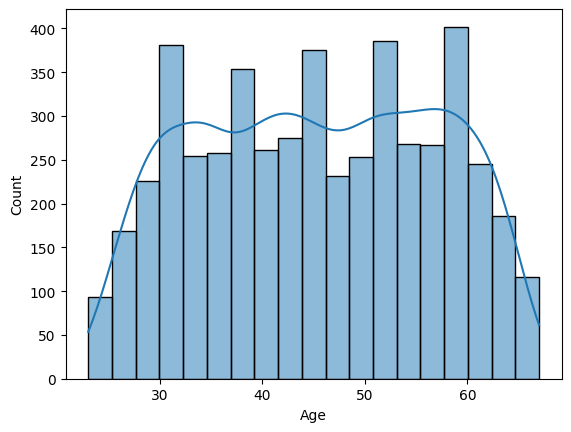

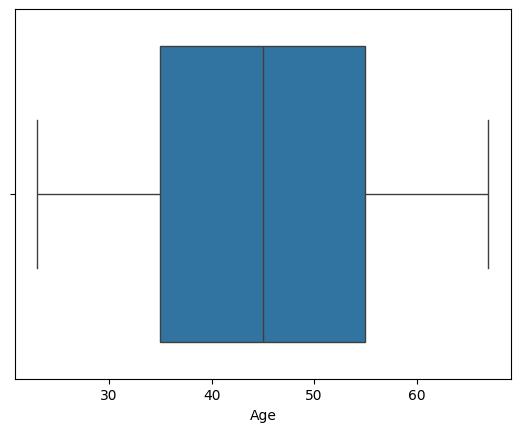

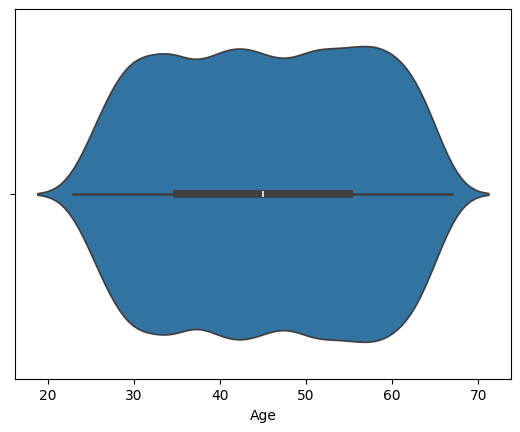

In [23]:
sns.histplot(data=loan_df, x='Age',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='Age')
plt.show()

sns.violinplot(data=loan_df,x='Age')
plt.show()

**Observations:**
- Age is uniform distribution. There are multiple modes.
- Median age is 45 years. There are no outliers.


**Experience**

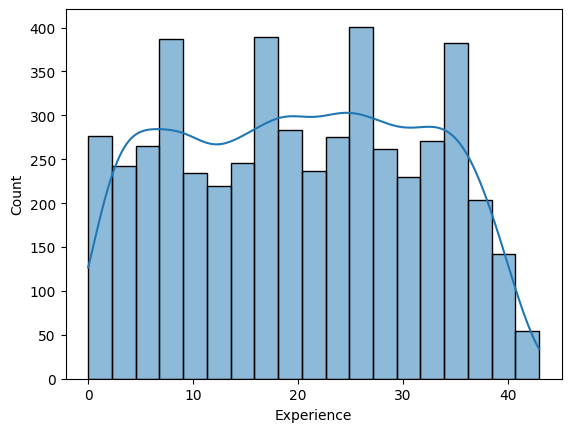

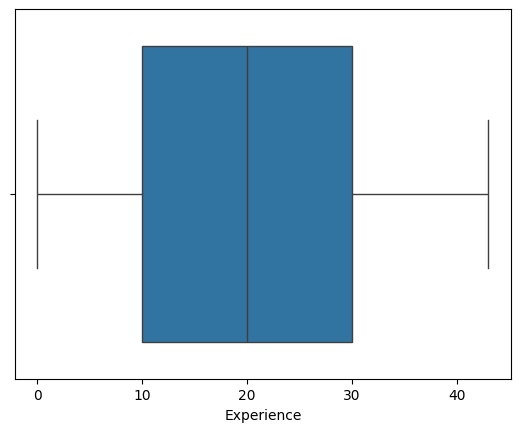

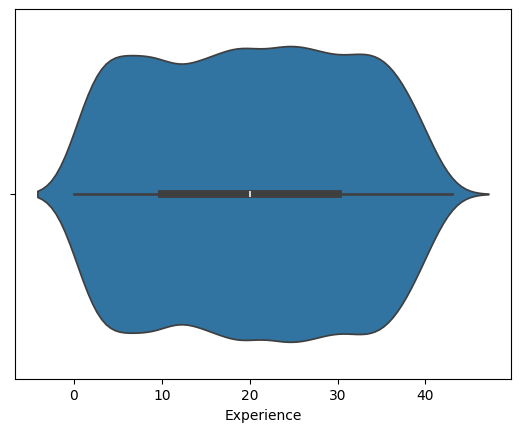

In [24]:
sns.histplot(data=loan_df, x='Experience',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='Experience')
plt.show()

sns.violinplot(data=loan_df,x='Experience')
plt.show()

**Observations:**
- Median experience is 20 years.
- Experience is uniform distribution with multiple modes.

**Income**

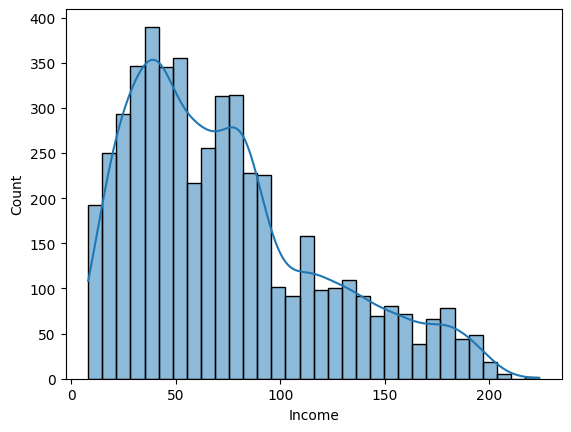

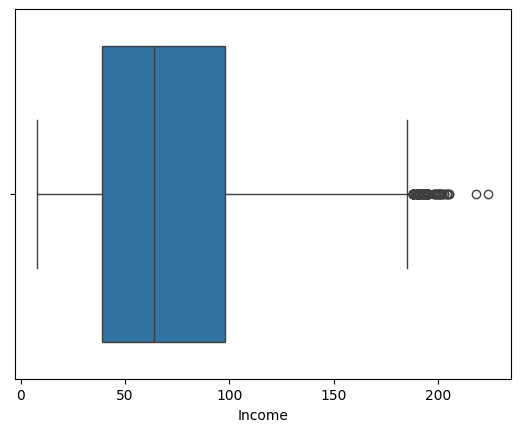

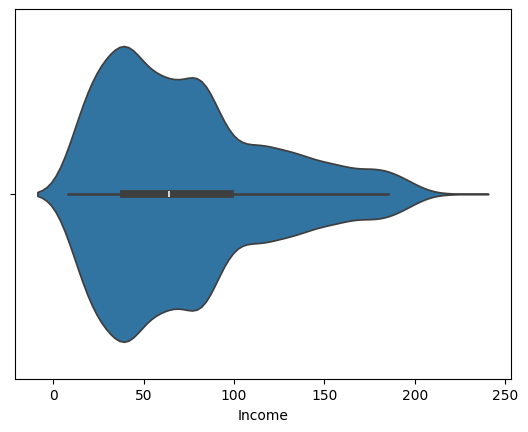

In [25]:
sns.histplot(data=loan_df, x='Income',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='Income')
plt.show()

sns.violinplot(data=loan_df,x='Income')
plt.show()

Observations:
- Income is right skewed distribution.
- There are outliers in income.
- Median income is around 53k.

**Family**

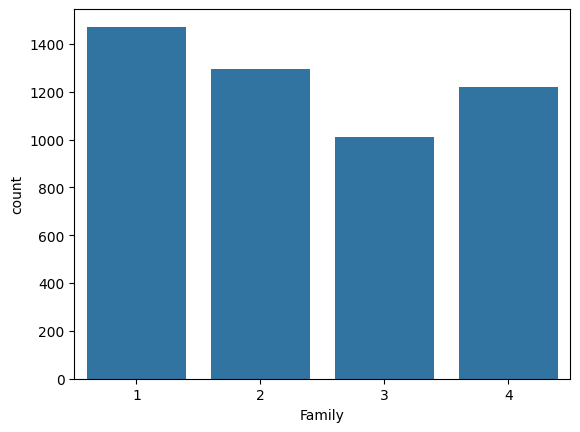

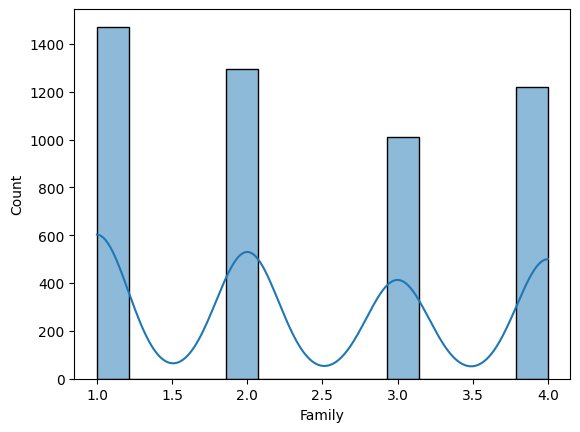

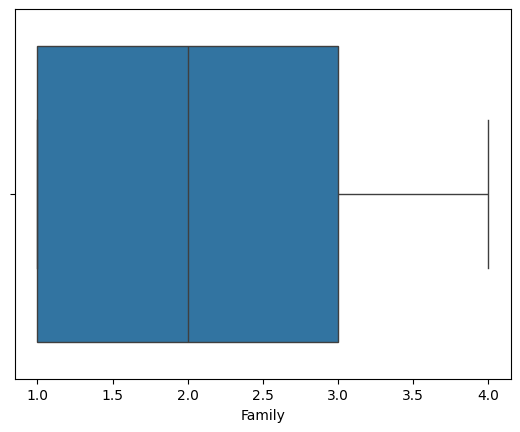

In [26]:
sns.countplot(data=loan_df,x='Family')
plt.show()

sns.histplot(data=loan_df, x='Family',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='Family')
plt.show()


**Observations:**
- Median family size is 2
- Single member family type clients are the highest followed by 2 member family.
- There are no outliers.

**CCAvg**

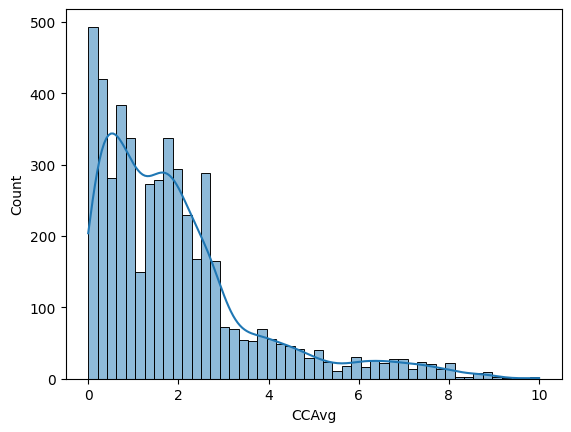

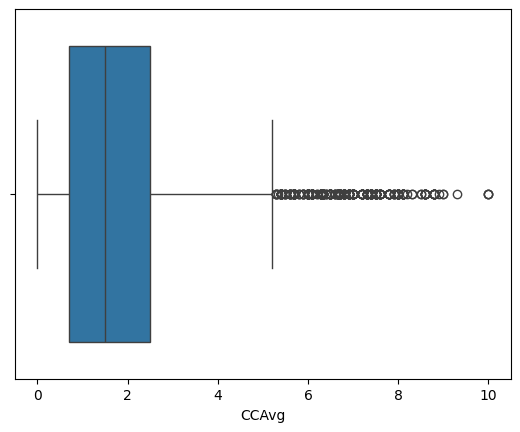

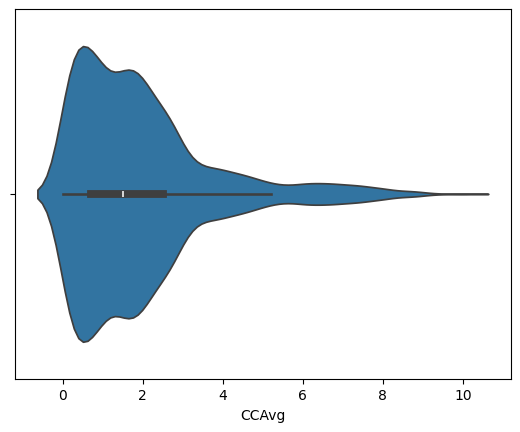

In [27]:
sns.histplot(data=loan_df, x='CCAvg',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='CCAvg')
plt.show()

sns.violinplot(data=loan_df,x='CCAvg')
plt.show()

**Observations:**
- CCAvg is right skewed distribution
- There are lot of outliers
- CCAvg median is around 1.5(in thousands)

**Mortgage**

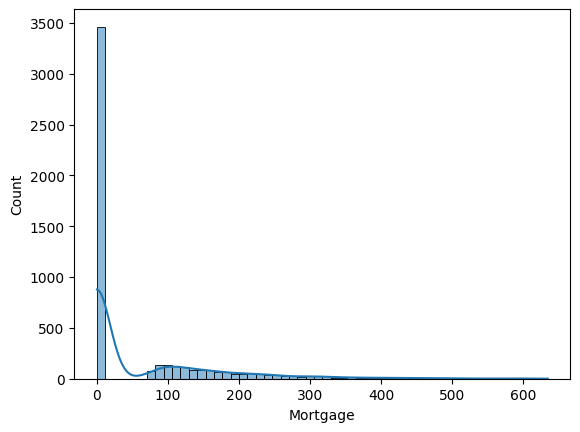

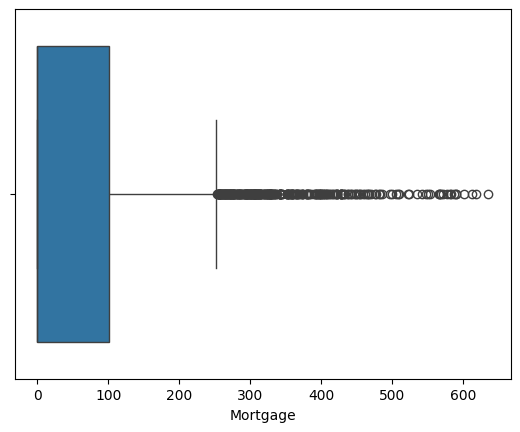

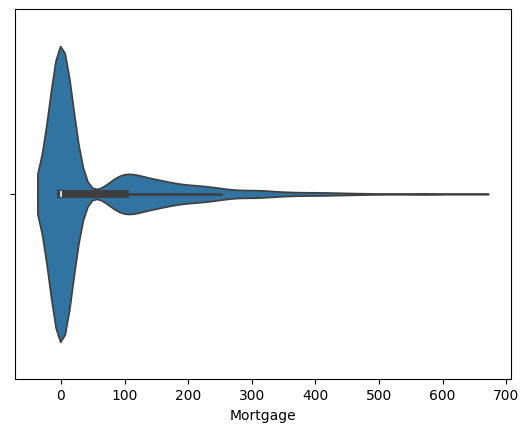

In [28]:
sns.histplot(data=loan_df, x='Mortgage',kde=True)
plt.show()

sns.boxplot(data=loan_df,x='Mortgage')
plt.show()

sns.violinplot(data=loan_df,x='Mortgage')
plt.show()

**Observations:**
- There are around 3500 clients with around 0 mortgage.
- There are outliers ranging from around 250k to 650k.
- Mortgage is right skewed distribution.


**Question 1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?**

Answer : Mortgage is right skewed distribution. There are around 3500 clients with around 0 mortgage. There are outliers in the distribution and ranges from 250k to 650k.

**Personal loan**

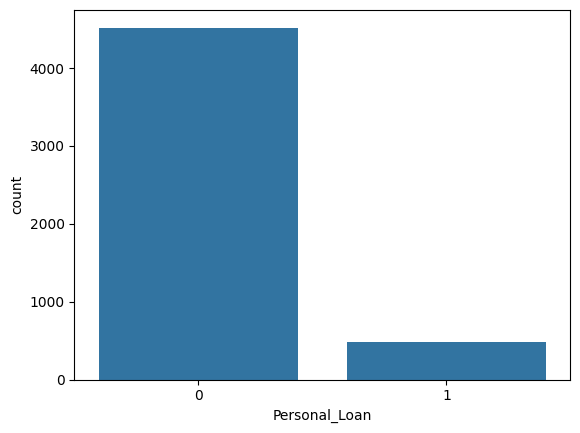

In [29]:
#sns.histplot(data=loan_df, x='Personal_Loan',kde=True)
#plt.show()

#sns.boxplot(data=loan_df,x='Personal_Loan')
#plt.show()

sns.countplot(data=loan_df,x='Personal_Loan')
plt.show()

In [30]:
loan_df['Personal_Loan'].value_counts(normalize=True)

Personal_Loan
0    0.904
1    0.096
Name: proportion, dtype: float64

Observations:
- 90.4% customers dont have personal loan.
- 9.6% customers have taken personal loan.

**Securities Account**

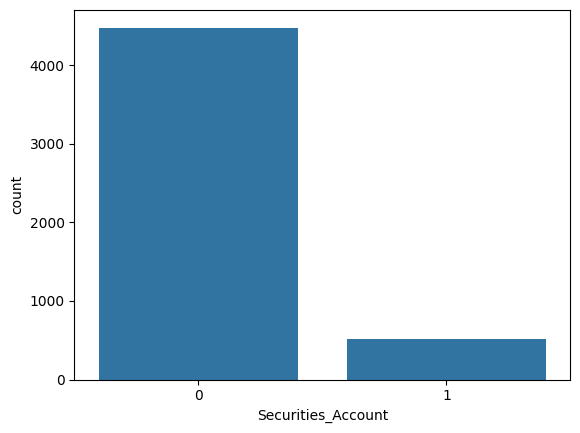

In [31]:
#sns.histplot(data=loan_df, x='Securities_Account',kde=True)
#plt.show()

#sns.boxplot(data=loan_df,x='Securities_Account')
#plt.show()

sns.countplot(data=loan_df,x='Securities_Account')
plt.show()

Observations:
- The numbers of customers who have Securities account is significantly lower.

**CD Account**

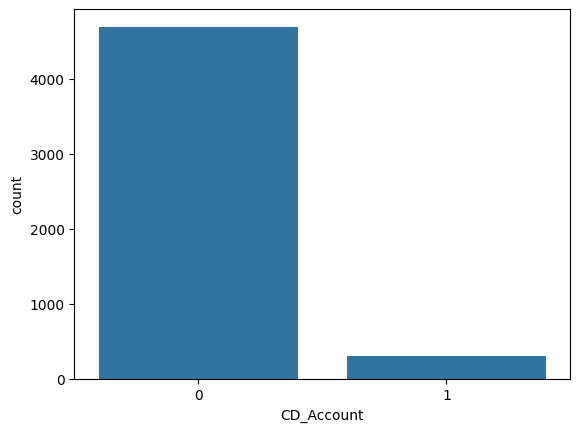

In [32]:
#sns.histplot(data=loan_df, x='CD_Account',kde=True)
#plt.show()

#sns.boxplot(data=loan_df,x='CD_Account')
#plt.show()

sns.countplot(data=loan_df,x='CD_Account')
plt.show()

Observations:
- The numbers of customers who have CD account is significantly lower.

**Online**

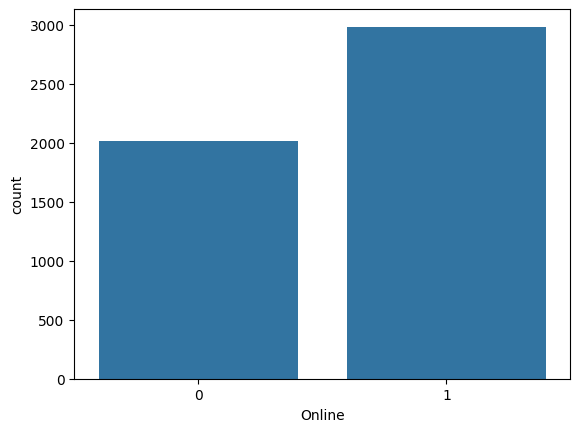

In [33]:
sns.countplot(data=loan_df,x='Online')
plt.show()

**Credit Card**

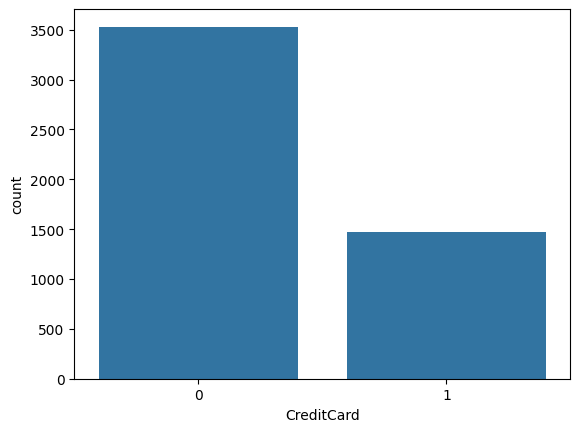

In [34]:
#sns.histplot(data=loan_df, x='CreditCard',kde=True)
#plt.show()

#sns.boxplot(data=loan_df,x='CreditCard')
#plt.show()

sns.countplot(data=loan_df,x='CreditCard')
plt.show()

**Question 2. How many customers have credit cards?**

In [35]:
#get the exact number of customers who have credit cards

loan_df[loan_df['CreditCard'] == 1].shape[0]

1470

Answer : There are 1470 customers who have credit cards.

#### Bivariate Analysis

**Analysis of relationship of all variables with target variables :**

Relationship between personal_loan and age

Relationship between personal_loan and Education
Relationship between personal_loan and Income
Relationship between personal_loan and Experience  

Relationship between personal_loan and Family

Relationship between  personal_loan and CCAvg

Relationship between  personal_loan and Mortgage

Relationship between  personal_loan and  Securities_Account

Relationship between  personal_loan and  CD_Account

Relationship between  personal_loan and  Online

Relationship between  personal_loan and  CreditCard

Relationship between  personal_loan and  Zipcode



**Analysis of other important relationships**

CCAvg and Education

CCAvg and Income

CCAvg and Age

CCAvg and Family


Mortgage and Education

Mortgage and Income

Mortgage and Age

Mortgage and Family



**Heatmap**

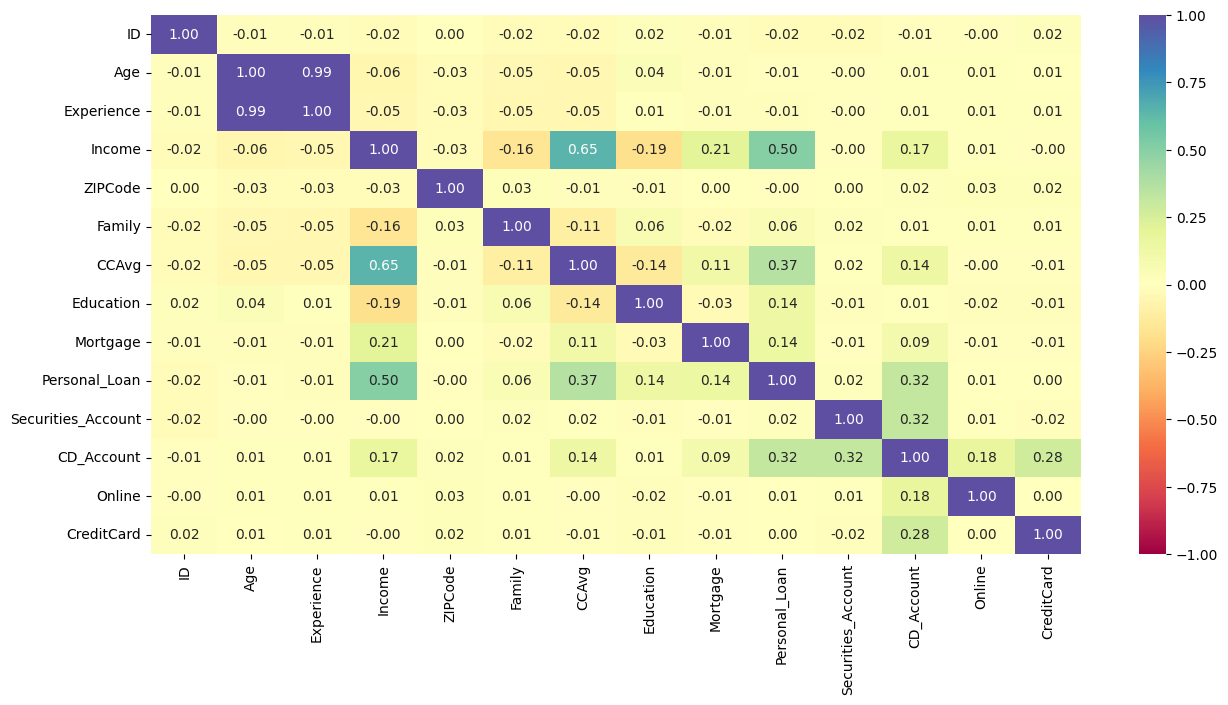

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations:**
- Age and Experience are higly correlated.
- Other positively correlated variables are CCAvg and Income, Personal_Loan and Income.
- There are low negatively correlated variables like Income and Education, CCAvg and Education

**Question 3. What are the attributes that have a strong correlation with the target attribute (personal loan)?**

Answer : Personal loan attribute is positively correlated with Income, CCAvg and CD_Account.

**Pairplot**

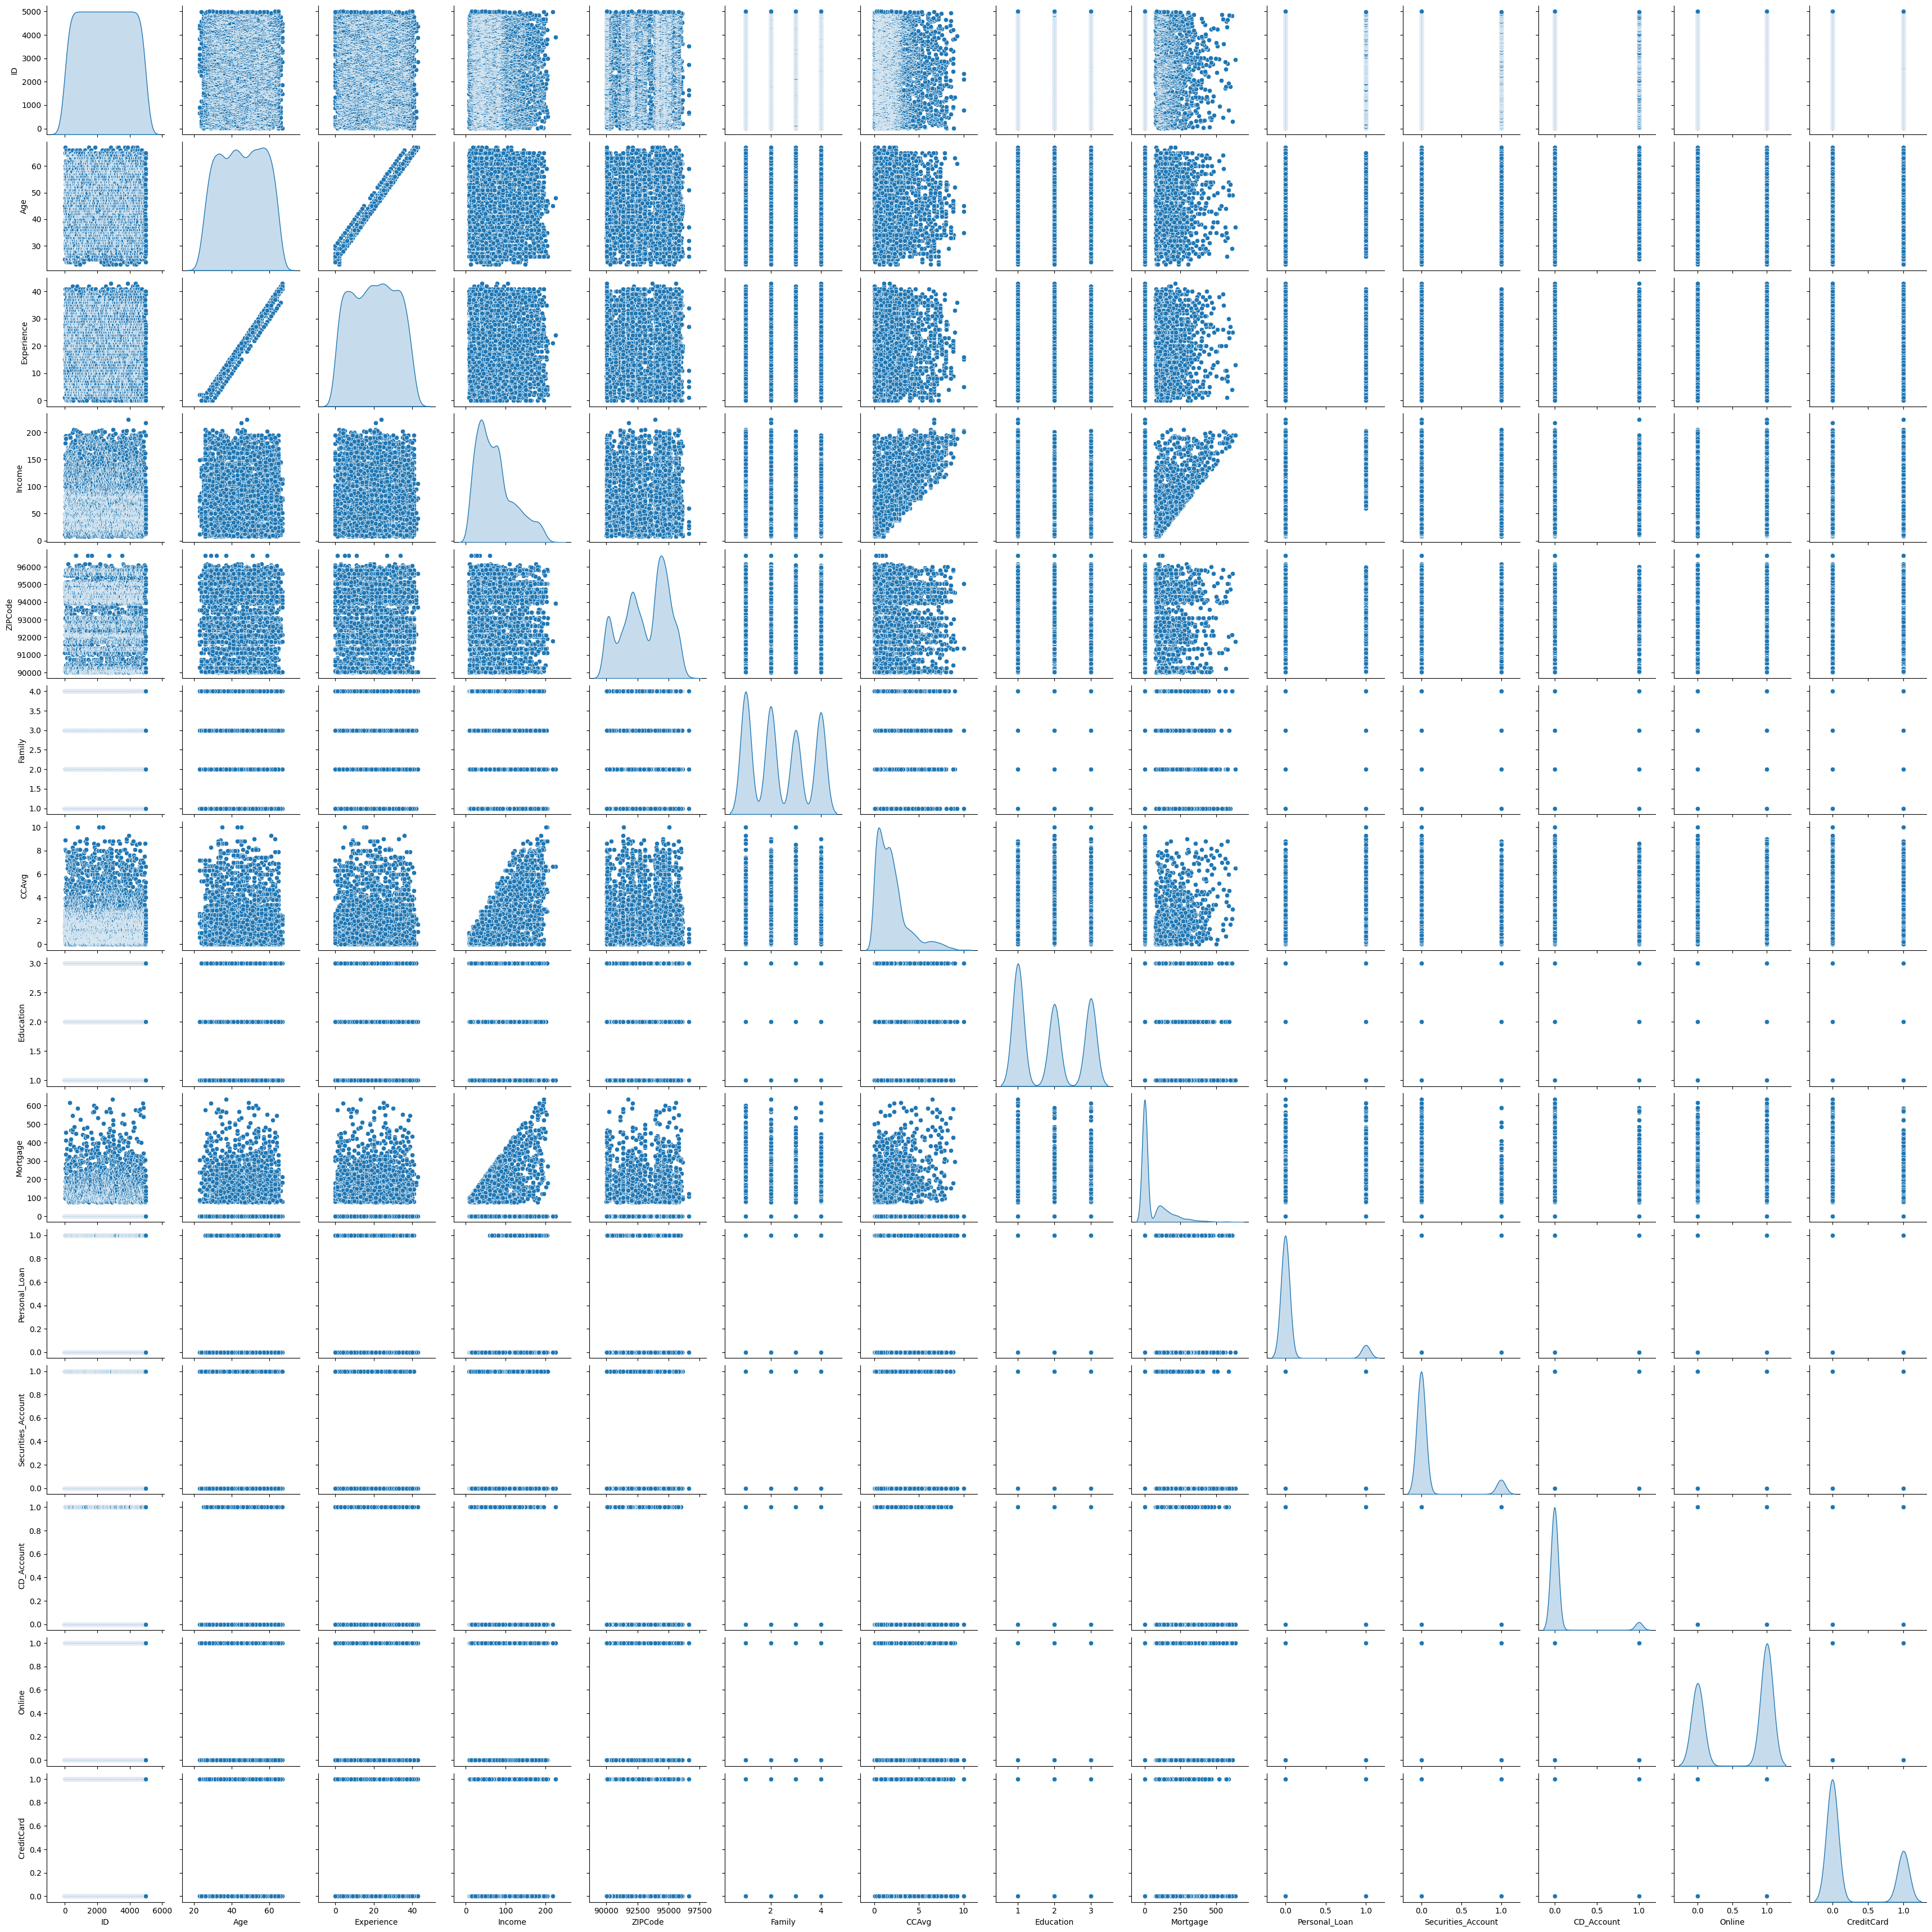

In [37]:
sns.pairplot(data=loan_df, diag_kind="kde")
plt.show()

**Observations:**
- Postively correlated variables
    - Experience and Age
    - Income and CCAvg
    - Mortgage and Income

### Analysis of relationships of all variables on target variable

**Analysis of Personal loan and Age relationship**

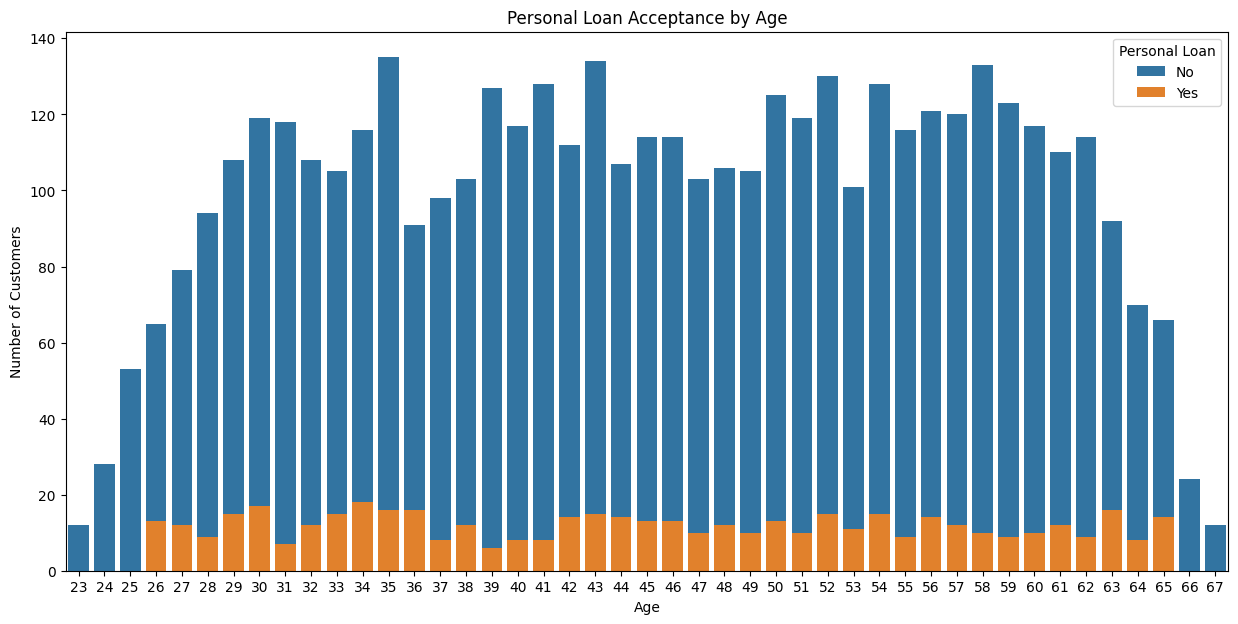

In [38]:
# Create a stacked bar chart using seaborn
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', hue='Personal_Loan', data=loan_df, dodge=False)
plt.title('Personal Loan Acceptance by Age')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

**Observations :**
- Customers with age between 23 to 25 and 66 to 67 have not taken personal loan.
- Customers with age between 26 and 65 take personal loan.
- Less than 20 customers in each age has taken personal loan.


**Create bins for each age group for analysis**

In [39]:
# Define age group bins and labels
bins = [20, 30, 40, 50, 60, 70]  # Adjust as needed
labels = ['20-29', '30-39', '40-49', '50-59', '60-69']  # Adjust as needed

# Create a new column with age group labels
loan_df['Age_Group'] = pd.cut(loan_df['Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display the updated DataFrame
loan_df.head()


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard Age_Group  
0              0                   1           0       0           0     20-29  
1              0                   1           0       0           0     40-49  
2              0                   0           0       0           0     30-39  
3              0                   0           0       0           0     30-39  
4              0                   0           0       0           1     30-39

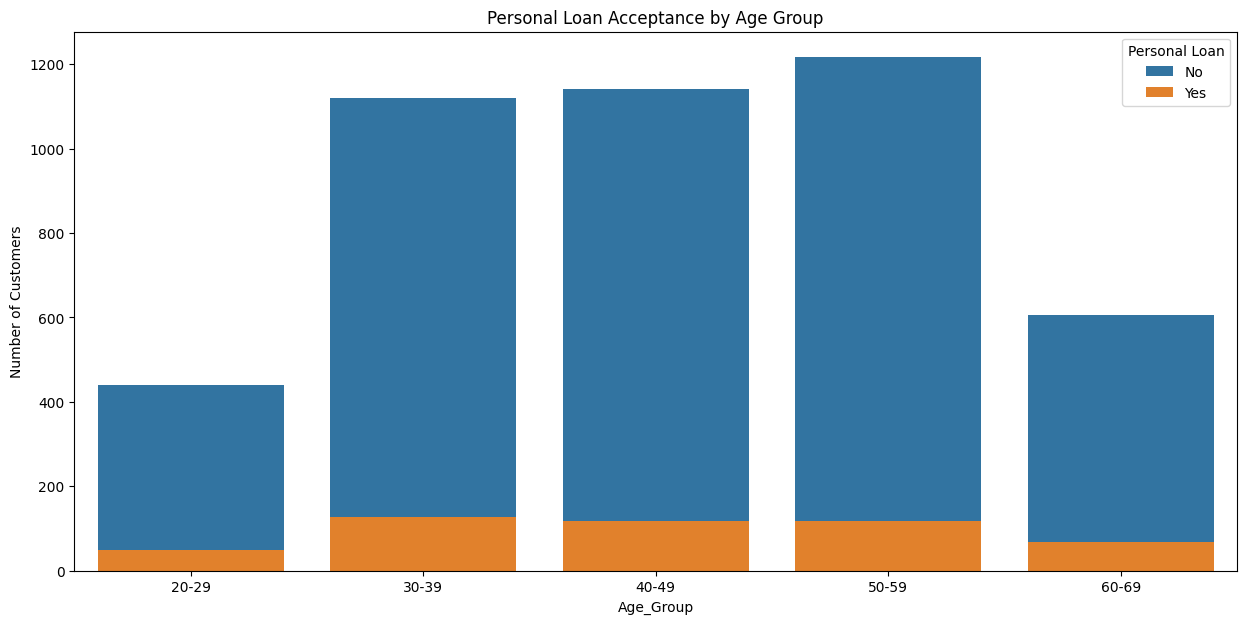

In [40]:
# Create a stacked bar chart using seaborn
plt.figure(figsize=(15, 7))
sns.countplot(x='Age_Group', hue='Personal_Loan', data=loan_df, dodge=False)
plt.title('Personal Loan Acceptance by Age Group')
plt.xlabel('Age_Group')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

In [41]:
loan_df.groupby('Age_Group')['Personal_Loan'].value_counts()

Age_Group  Personal_Loan
20-29      0                 439
           1                  49
30-39      0                1120
           1                 127
40-49      0                1140
           1                 117
50-59      0                1216
           1                 118
60-69      0                 605
           1                  69
Name: count, dtype: int64

**Question 4. How does a customer's interest in purchasing a loan vary with their age?**

Answer:
- Customers with age between 23 to 25 and 66 to 67 have not taken personal loan.
- Customers with age between 26 and 65 take personal loan.
- Less than 20 customers in each age has taken personal loan.
- Age group 30-39 have the most number of customers who have taken personal loan followed by age group 50-59 and 40-49.

**Analysis of Personal Loan and Education relationship**

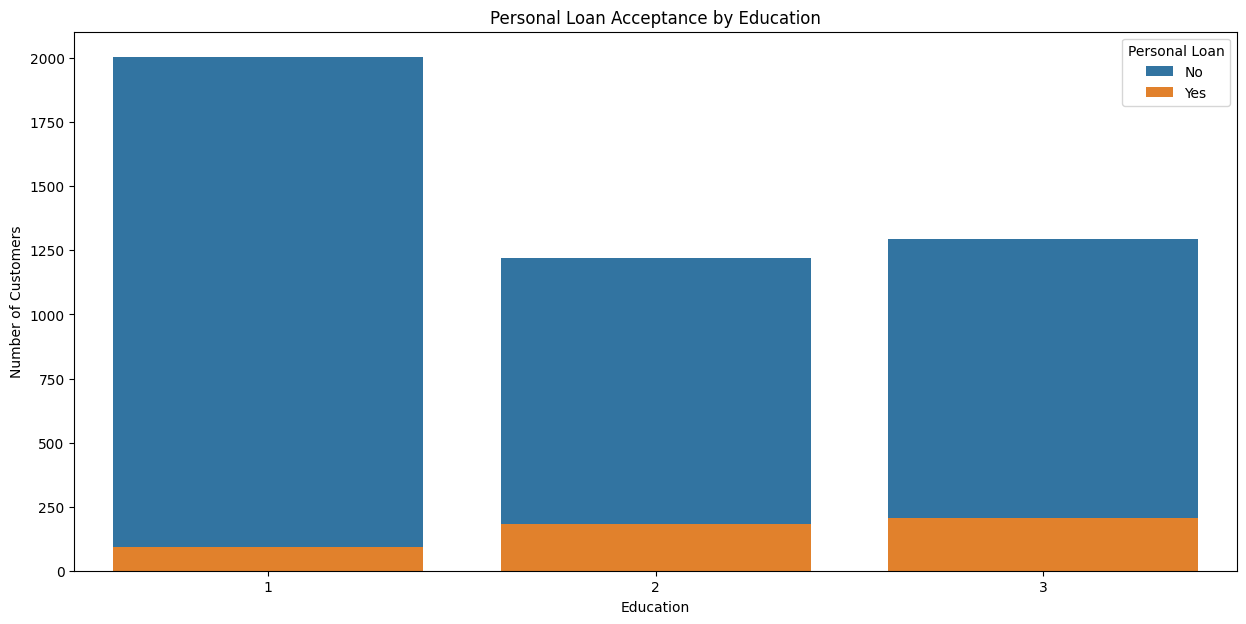

In [42]:
# Create a stacked bar chart using seaborn
plt.figure(figsize=(15, 7))
sns.countplot(x='Education', hue='Personal_Loan', data=loan_df, dodge=False)
plt.title('Personal Loan Acceptance by Education')
plt.xlabel('Education')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

In [43]:
# Group by Education to get the count of customers who have taken personal loan
loan_df.groupby('Education')['Personal_Loan'].value_counts()

Education  Personal_Loan
1          0                2003
           1                  93
2          0                1221
           1                 182
3          0                1296
           1                 205
Name: count, dtype: int64

**Question 5. How does a customer's interest in purchasing a loan vary with their education?**

Answer:
- Undergrad customers are less likely to take personal loan.
- Advanced/Professional education category have the most number of customers who have taken personal loan followed by graduate category.


**Analysis of personal_loan and Income relationship**


In [44]:
# Create a stacked bar chart using seaborn
#plt.figure(figsize=(15, 7))
#sns.countplot(x='Income', hue='Personal_Loan', data=loan_df, dodge=False)
#plt.title('Personal Loan Acceptance by Income')
#plt.xlabel('Income')
#plt.ylabel('Number of Customers')
#plt.legend(title='Personal Loan', labels=['No', 'Yes'])
#plt.xticks(rotation=90)
#plt.show()

#output is too clumpsy

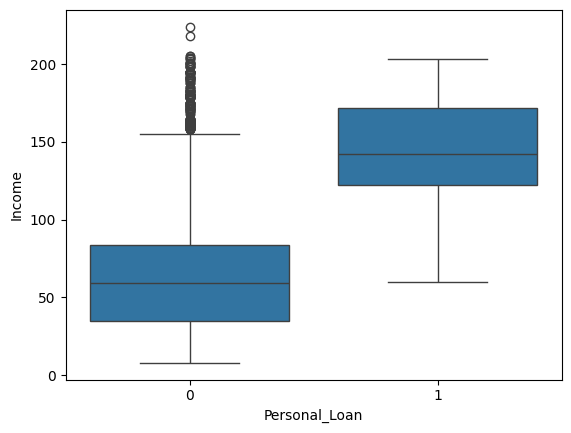

In [45]:
sns.boxplot(data=loan_df,x='Personal_Loan',y='Income')
plt.show()

**Observations:**
- Minimum income of clients who take personal loan is around 52k.
- There are outliers- higher income,but do not take personal loan.

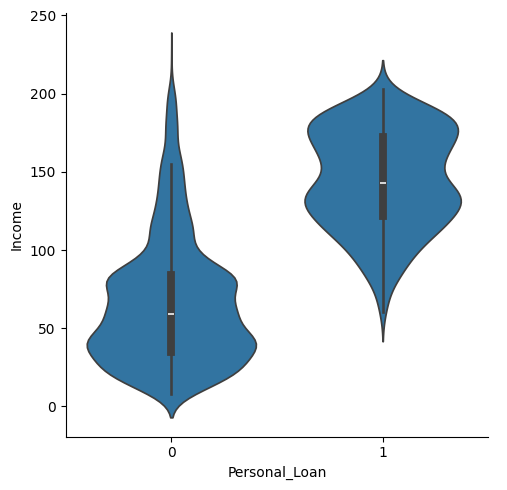

In [46]:
sns.catplot(data=loan_df,x='Personal_Loan',y='Income',kind='violin')
plt.show()

Observations:
- Median income of customers who take personal loan(around 149k) is much higher than those who do not take personal loan

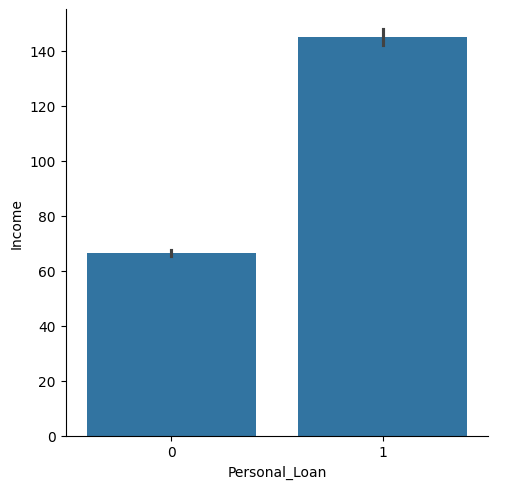

In [47]:
sns.catplot(data=loan_df,x='Personal_Loan',y='Income',kind='bar')
plt.show()

**Observations:**
- Average income of customers who dont take personal loan is around 62k.
- Average income of customers who take personal loan is around 142k.

**Relationship between personal_loan and Experience**

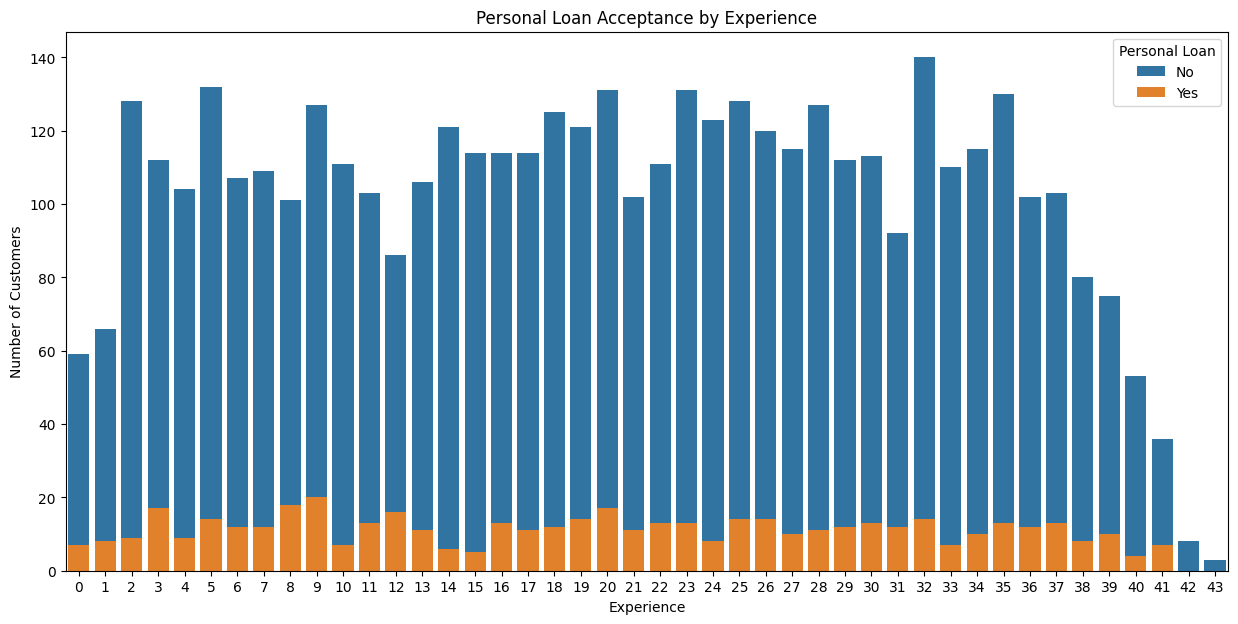

In [48]:
# Create a stacked bar chart using seaborn
plt.figure(figsize=(15, 7))
sns.countplot(x='Experience', hue='Personal_Loan', data=loan_df, dodge=False)
plt.title('Personal Loan Acceptance by Experience')
plt.xlabel('Experience')
plt.ylabel('Number of Customers')
plt.legend(title='Personal Loan', labels=['No', 'Yes'])
plt.show()

Observations:
  - We see even distribution of customers who have taken loan based on experience
  - 9 years and 8 years of experience have 20 and 18 customers who have taken personal loan. They are slightly higher than the rest.
  - Customers with 42 and 43 years of experience have not taken personal loan

In [49]:
#get count of customers who have personal loan.Group by Experience
loan_df[loan_df['Personal_Loan'] == 1].groupby('Experience')['Personal_Loan'].sum()

Experience
0      7
1      8
2      9
3     17
4      9
5     14
6     12
7     12
8     18
9     20
10     7
11    13
12    16
13    11
14     6
15     5
16    13
17    11
18    12
19    14
20    17
21    11
22    13
23    13
24     8
25    14
26    14
27    10
28    11
29    12
30    13
31    12
32    14
33     7
34    10
35    13
36    12
37    13
38     8
39    10
40     4
41     7
Name: Personal_Loan, dtype: int64

**Relationship between personal_loan and Family**

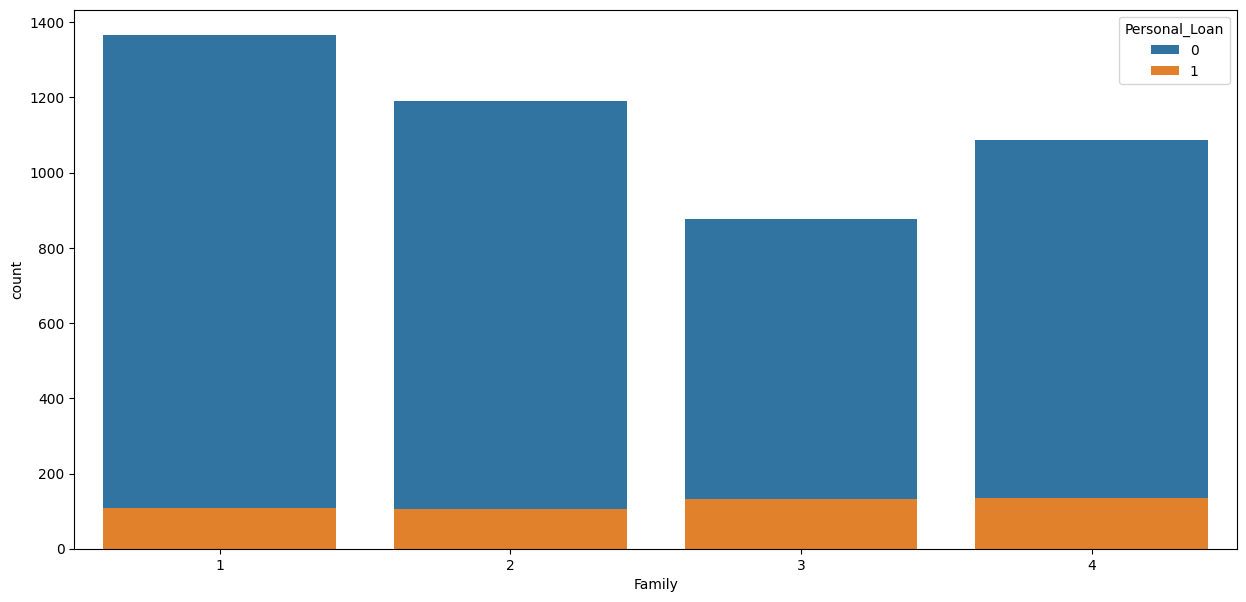

In [50]:
plt.figure(figsize=(15, 7))
sns.countplot(data=loan_df,x='Family',hue='Personal_Loan',dodge=False)
plt.show()

Observations:
- Family size hasnt influenced the number of customers who have taken personal loan.


**Relationship between  personal_loan and CCAvg**

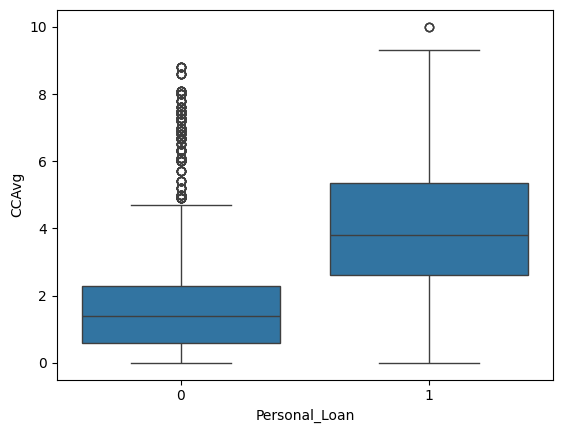

In [51]:
sns.boxplot(data=loan_df,x='Personal_Loan',y='CCAvg')
plt.show()

**Observations:**
- There are outliers in CCAvg for both personal loan categories.
- The Median CCAvg of customers who take personal loan is much higher(around 3.9k) than the median of customers who dont take loan.

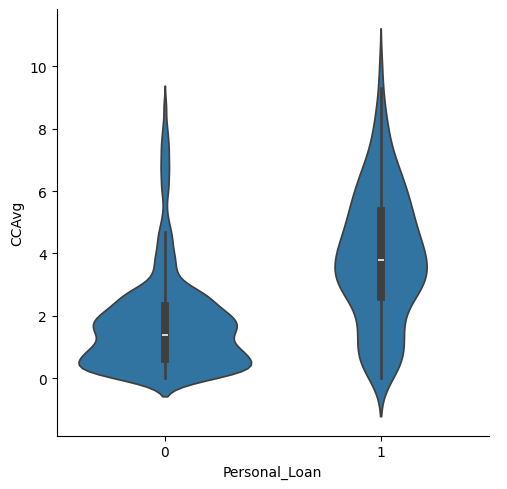

In [52]:
sns.catplot(data=loan_df,x='Personal_Loan',y='CCAvg',kind='violin')
plt.show()

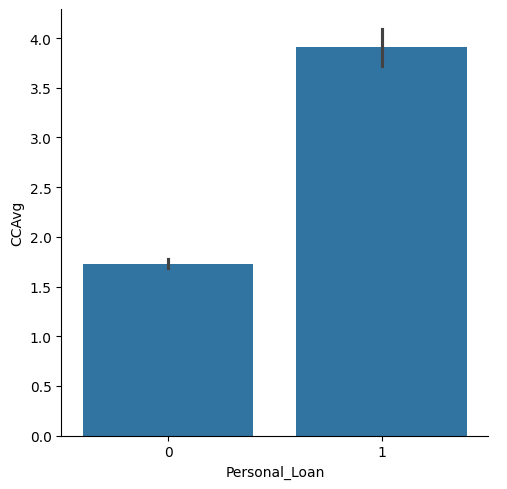

In [53]:
sns.catplot(data=loan_df,x='Personal_Loan',y='CCAvg',kind='bar')
plt.show()

Observations:
- Average CCAvg is around 1.7 for customers who dont have personal loan and 3.9 for customers who have personal loan.

**Relationship between  personal_loan and Mortgage**

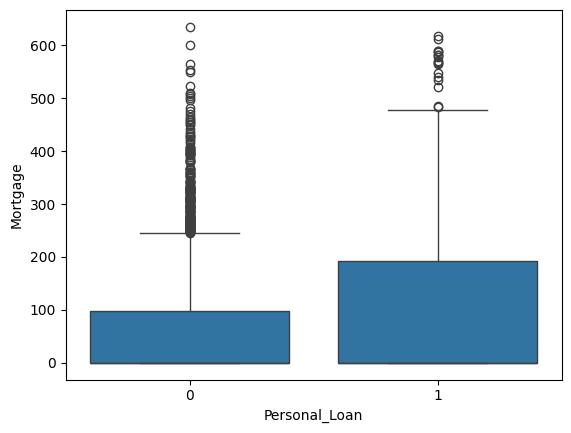

In [54]:
sns.boxplot(data=loan_df,x='Personal_Loan',y='Mortgage')
plt.show()

Observations:
- There are outliers in both the personal loan categories for Mortgage.

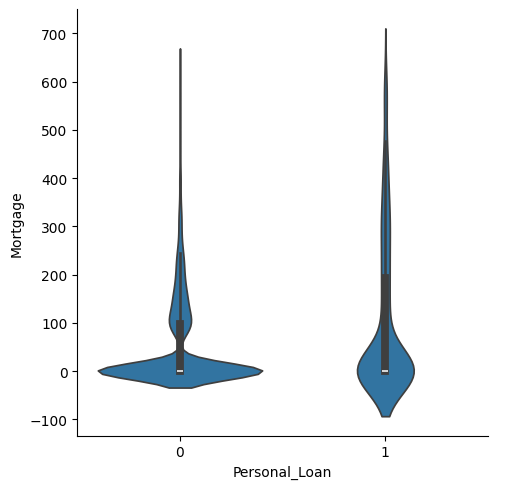

In [55]:
sns.catplot(data=loan_df,x='Personal_Loan',y='Mortgage',kind='violin')
plt.show()

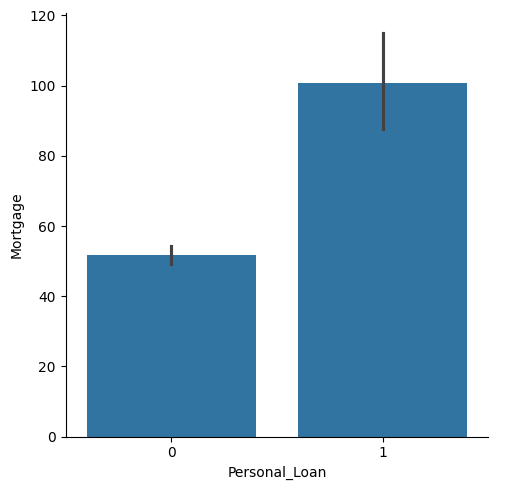

In [56]:
sns.catplot(data=loan_df,x='Personal_Loan',y='Mortgage',kind='bar')
plt.show()

Observations:
- Avg Mortgage is around 100k for customers who take personal loan and around 54k for customers who dont take personal loan.

**Relationship between  personal_loan and  Securities_Account**

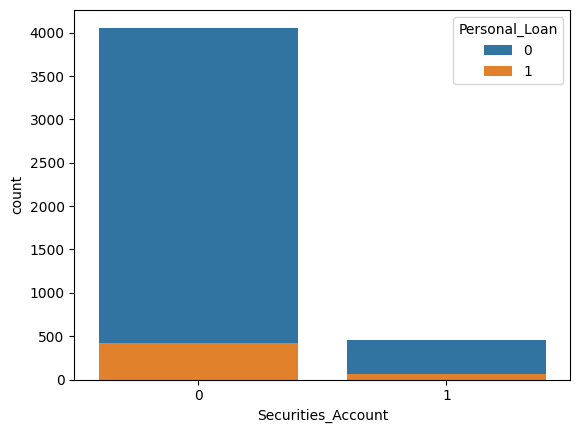

In [57]:
sns.countplot(data=loan_df,x='Securities_Account',hue='Personal_Loan',dodge=False)
plt.show()

Observations:
- There are very less Customers with personal loan who have securities_account.

**Relationship between  personal_loan and  CD_Account**

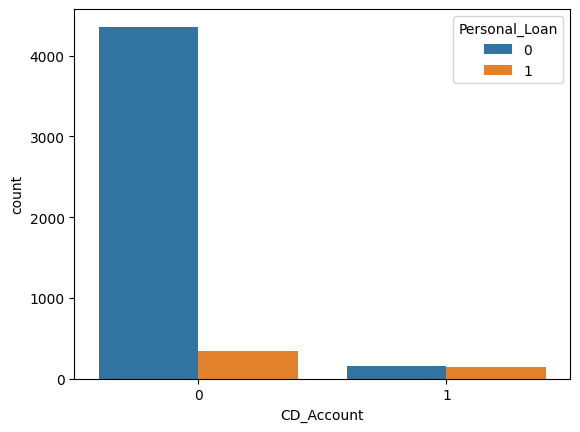

In [58]:
sns.countplot(data=loan_df,x='CD_Account',hue='Personal_Loan')
plt.show()

Observations:

- There are equal number of customers who have CD Account and who have taken personal loan.

**Relationship between  personal_loan and  Online**

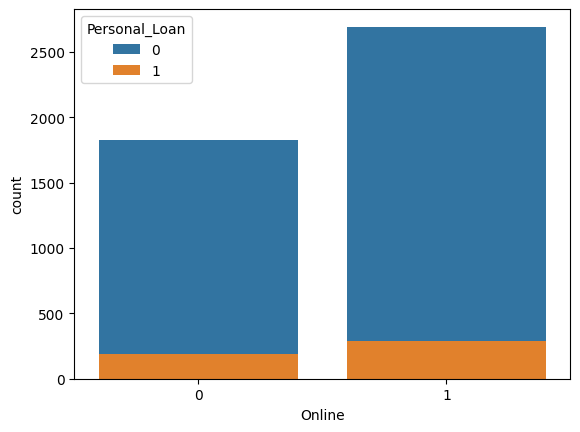

In [59]:
sns.countplot(data=loan_df,x='Online',hue='Personal_Loan',dodge=False)
plt.show()

**Observations:**
- Customers who do online banking are more than who do not.


**Relationship between  personal_loan and  CreditCard**

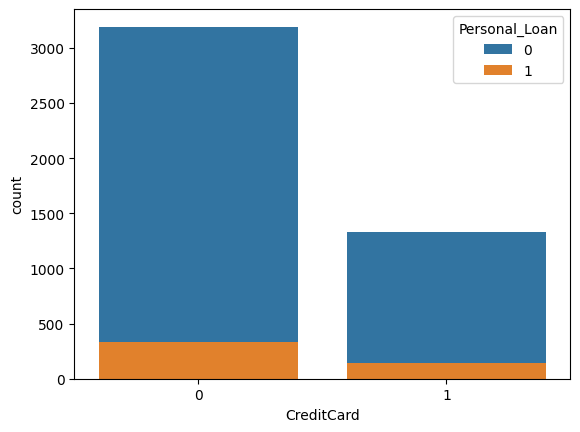

In [60]:
sns.countplot(data=loan_df,x='CreditCard',hue='Personal_Loan',dodge=False)
plt.show()

**Relationship between Personal loan and zipcode**

Categorize zipcode to its nearest major city

In [61]:
search = SearchEngine( )

In [62]:
# method which returns the city name when given the zipcode
def get_major_city(zipcode):
       result = search.by_zipcode(zipcode)
       if result:
           return result.major_city
       else:
           return None  # Handle cases where zip code is not found

In [63]:
#create a new column - major_city which represents the city to which the zipcode belongs
loan_df_bkup = loan_df.copy()
loan_df['major_city'] = loan_df['ZIPCode'].apply(get_major_city)

In [64]:
loan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  Age_Group     major_city  
0     20-29       Pasadena  
1     40-49    Los Angeles  
2     30-39       Berkeley  
3     30-39  San Francisco  
4     30-39     Northridge

In [65]:
#check if there are rows with no city names
loan_df['major_city'].isnull().sum()

34

In [66]:
# replace null values with 'Unknow City' value
loan_df['major_city'].fillna('Unknown City', inplace=True)

In [67]:
loan_df['major_city'].isnull().sum()

0

In [68]:
loan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  Age_Group     major_city  
0     20-29       Pasadena  
1     40-49    Los Angeles  
2     30-39       Berkeley  
3     30-39  San Francisco  
4     30-39     Northridge

In [69]:
loan_df.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard Age_Group   major_city  
4995           0     20-29       Irvine  
4996           0     30-39     La Jolla  
4997           0     60-69         Ojai  
4998           0     60-69  Los Angeles  
4999           1     20-29       Irvine

In [70]:
loan_df['major_city'].nunique()

245

Observations:
 - Since there are 245 unique cities, we can add state category.

In [71]:
def get_state(zipcode):
       result = search.by_zipcode(zipcode)
       if result:
           return result.state
       else:
           return None  # Handle cases where zip code is not found

In [72]:
loan_df['state'] = loan_df['ZIPCode'].apply(get_state)

In [73]:
loan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  Age_Group     major_city state  
0     20-29       Pasadena    CA  
1     40-49    Los Angeles    CA  
2     30-39       Berkeley    CA  
3     30-39  San Francisco    CA  
4     30-39     Northridge    CA

In [74]:
loan_df['state'].isnull().sum()

34

In [75]:
loan_df['state'].fillna('Unknown State', inplace=True)

In [76]:
loan_df['state'].isnull().sum()

0

In [77]:
#check how many unique states are there in the data
loan_df['state'].nunique()

2

In [78]:
#display the unique state values
loan_df['state'].unique()

array(['CA', 'Unknown State'], dtype=object)

**Observations:**
- It looks like the data is from one state only. We dont need to have a state column, we can drop the state column.

In [79]:
#Drop the state column
loan_df.drop('state',axis=1,inplace=True)

In [80]:
loan_df.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

  Age_Group     major_city  
0     20-29       Pasadena  
1     40-49    Los Angeles  
2     30-39       Berkeley  
3     30-39  San Francisco  
4     30-39     Northridge

In [81]:
#find major cities in which customers take personal loan
loan_df[loan_df['Personal_Loan'] == 1]['major_city'].value_counts()

major_city
Los Angeles        38
Berkeley           27
San Diego          21
San Francisco      19
Palo Alto          16
                   ..
Capitola            1
Seal Beach          1
North Hollywood     1
Hawthorne           1
El Dorado Hills     1
Name: count, Length: 142, dtype: int64

**Observations:**
 - There are 142 cities where customers have taken personal loan.
 - The top 5 cities where customers took personal loan are
    - Los Angeles
    - Berkeley
    - San Diego
    - San Francisco
    - Palo Alto

### Analysis of other key relationships

CCAvg and Education

CCAvg and Income

CCAvg and Age

CCAvg and Family


Mortgage and Education

Mortgage and Income

Mortgage and Age

Mortgage and Family

**CCAvg and Education**

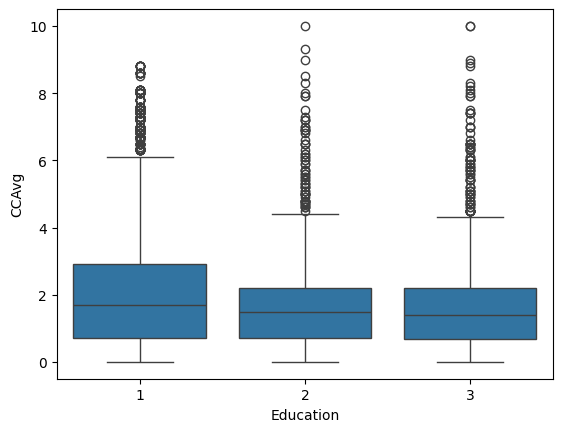

In [82]:
sns.boxplot(data=loan_df,x='Education',y='CCAvg')
plt.show()

Observations:
- There are outliers in all education categories.
- Median CCAvg is less than 2 across all education categories

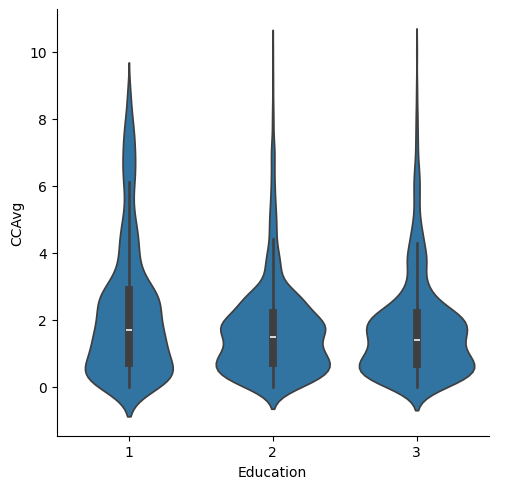

In [83]:
sns.catplot(data=loan_df,x='Education',y='CCAvg',kind='violin')
plt.show()

Observations:
- Median CCAvg across education categories is less than 2k.
- Distribution of education category 2 and 3 are very similar.

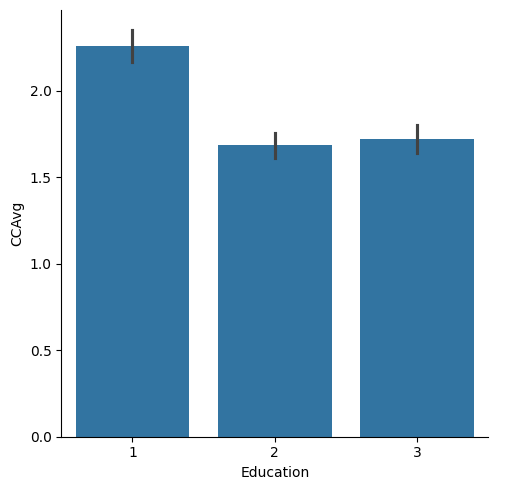

In [84]:
sns.catplot(data=loan_df,x='Education',y='CCAvg',kind='bar')
plt.show()

Observations:
- Average CCAvg is around 1.6 for graduates and Advanced/Professional.
- Undergrad CCAvg seems to be the highest.

**CCAvg and Income**

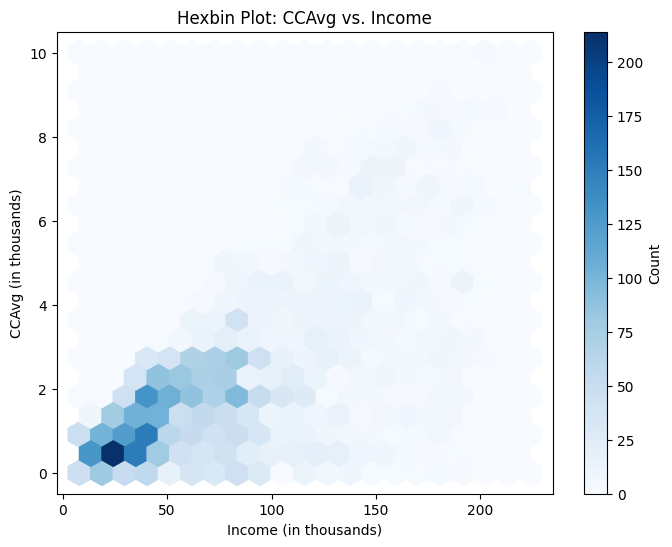

In [85]:
plt.figure(figsize=(8, 6))
plt.hexbin(loan_df['Income'], loan_df['CCAvg'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: CCAvg vs. Income')
plt.xlabel('Income (in thousands)')
plt.ylabel('CCAvg (in thousands)')
plt.show()

Observations:
- Color intensity represents the density of data points in different areas of the plot.
- Data points seem to be the highest around 30k Income and around 0.75k CCAvg.

**CCAvg and Age_Group**

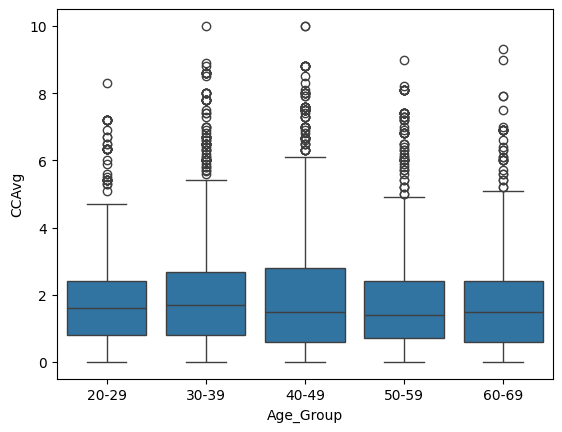

In [86]:
#CCAvg and Age_Group
sns.boxplot(data=loan_df,x='Age_Group',y='CCAvg')
plt.show()

Observations:
- Median CCAvg is less than 2k.
- There are outliers in all the age groups.

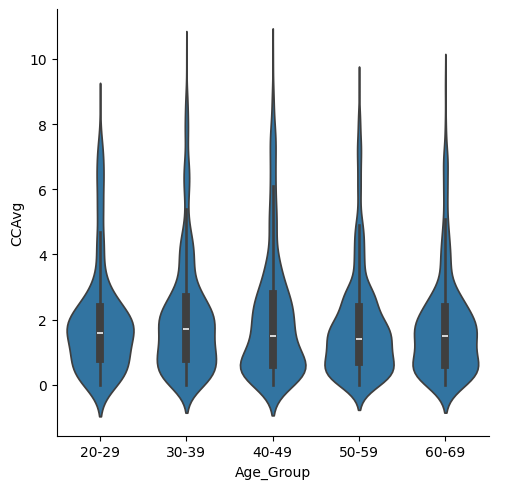

In [87]:
sns.catplot(data=loan_df,x='Age_Group',y='CCAvg',kind='violin')
plt.show()

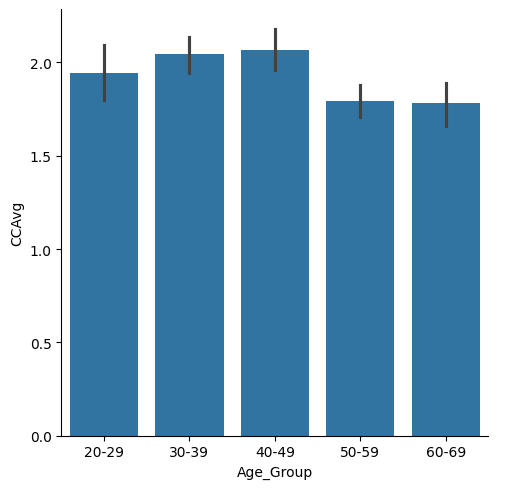

In [88]:
sns.catplot(data=loan_df,x='Age_Group',y='CCAvg',kind='bar')
plt.show()

Observations:
- Age group 30-39 and 40-49 is very similar. Age group 50-59 and 60-69 is very similar.

**CCAvg and Family**

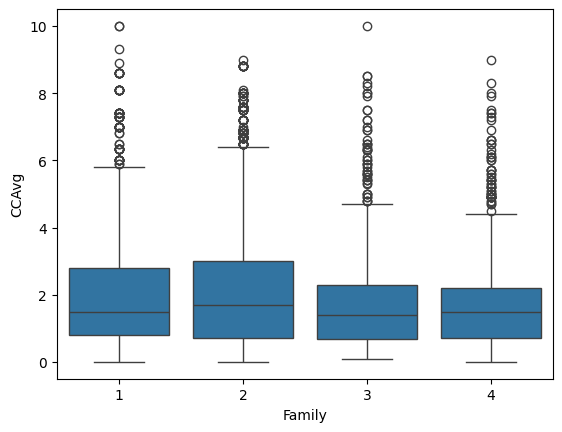

In [89]:
sns.boxplot(data=loan_df,x='Family',y='CCAvg')
plt.show()

**Observations:**
- There are outliers for all family sizes.
- Median CCAvg is around 1.8k for Family size 1,3 and 4. Median CCAvg is around 1.9k for family size 2.

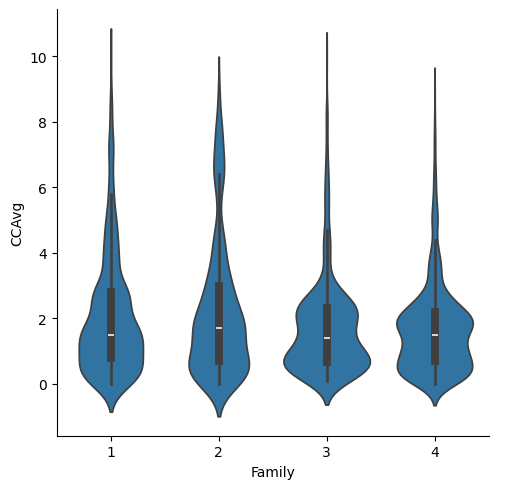

In [90]:
sns.catplot(data=loan_df,x='Family',y='CCAvg',kind='violin')
plt.show()

Observations:
- Distribution of Family size 3 and 4 are very similar.


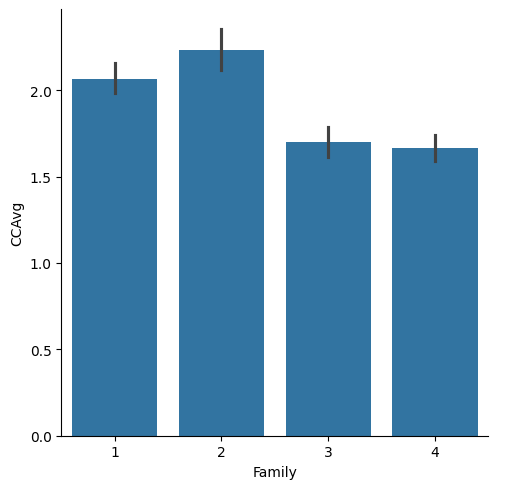

In [91]:
sns.catplot(data=loan_df,x='Family',y='CCAvg',kind='bar')
plt.show()

**Observations:**
- Average CCAvg is around 1.7k for family size 3 and 4. Avg CCAvg is 2.0k for family size 1 and 2.5k for family size 2.

**Mortgage and Education**

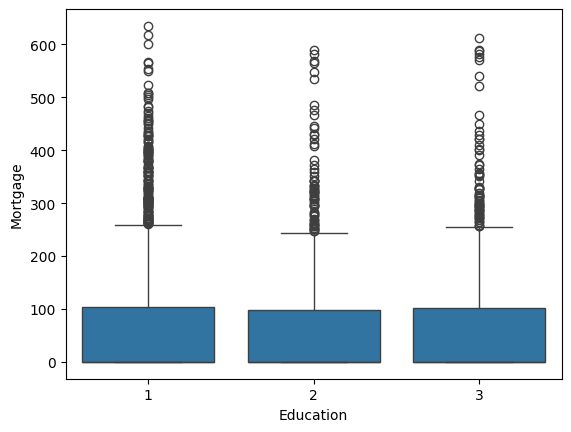

In [92]:
sns.boxplot(data=loan_df,x='Education',y='Mortgage')
plt.show()

Observations:
- There are outliers in all education categories for Mortgage.

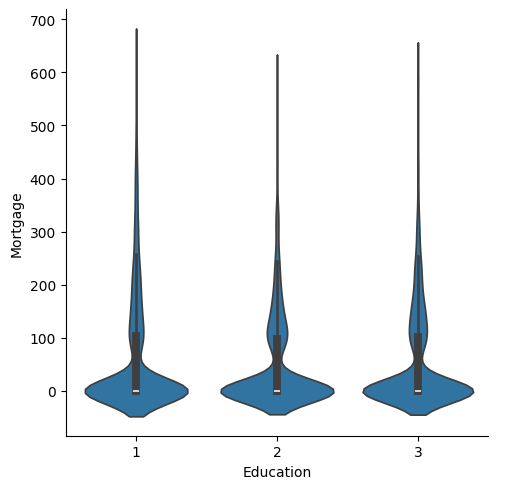

In [93]:
sns.catplot(data=loan_df,x='Education',y='Mortgage',kind='violin')
plt.show()

**Observations:**
- Mortgage distribution looks similar across all the 3 educational categories.

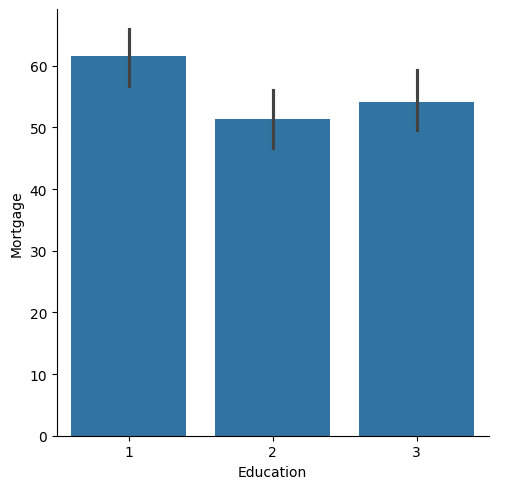

In [94]:
sns.catplot(data=loan_df,x='Education',y='Mortgage',kind='bar')
plt.show()

Observations:
- Avg Mortgage is around 60k for undergrads, 50k for grads and around 54k for advanced/professional.

**Mortgage and Income**

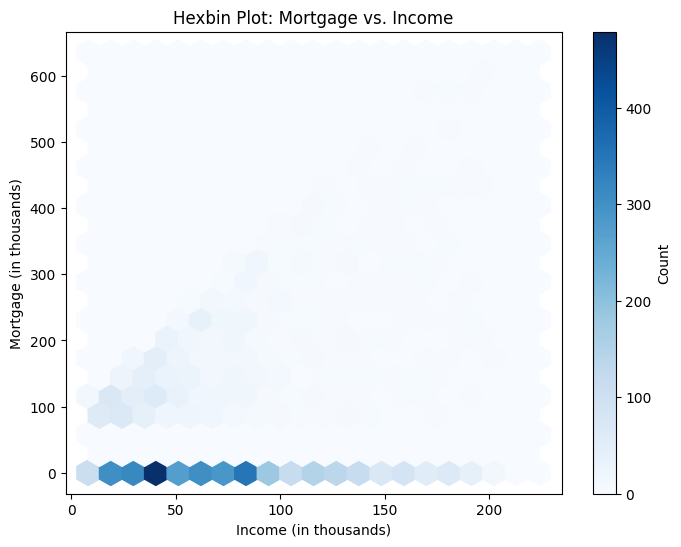

In [95]:
plt.figure(figsize=(8, 6))
plt.hexbin(loan_df['Income'], loan_df['Mortgage'], gridsize=20, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot: Mortgage vs. Income')
plt.xlabel('Income (in thousands)')
plt.ylabel('Mortgage (in thousands)')
plt.show()

Observations:
- Concentration of datapoints with lower income customers (less than 100k) with no mortgage or smaller mortgage.

**Mortgage and Age_Group**

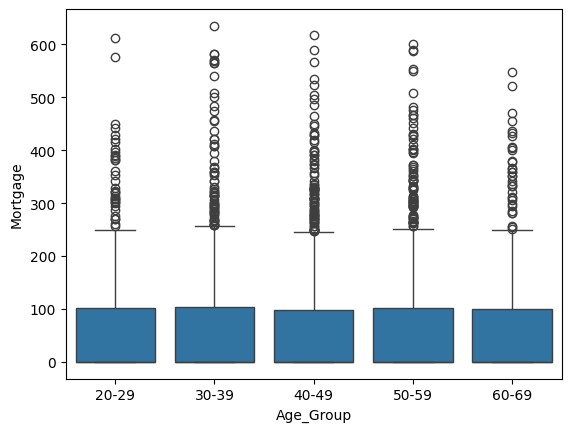

In [96]:
sns.boxplot(data=loan_df,x='Age_Group',y='Mortgage')
plt.show()

Observations:
- There are outliers for Mortgage in all age groups.

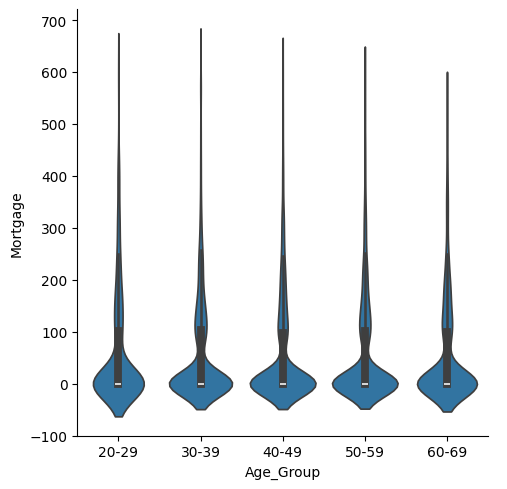

In [97]:
sns.catplot(data=loan_df,x='Age_Group',y='Mortgage',kind='violin')
plt.show()

Observations:
- The Mortgage distributions looks very similar across age group 30-39,40-49,50-50 and 60-69

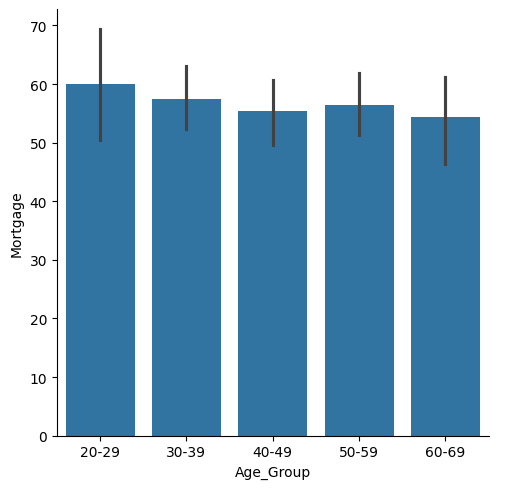

In [98]:
sns.catplot(data=loan_df,x='Age_Group',y='Mortgage',kind='bar')
plt.show()

Observations:
- Avg Mortgage across all age groups is below 60k.
- Age_group 20-29 has the highest avg of around 60k

**Mortgage and Family**

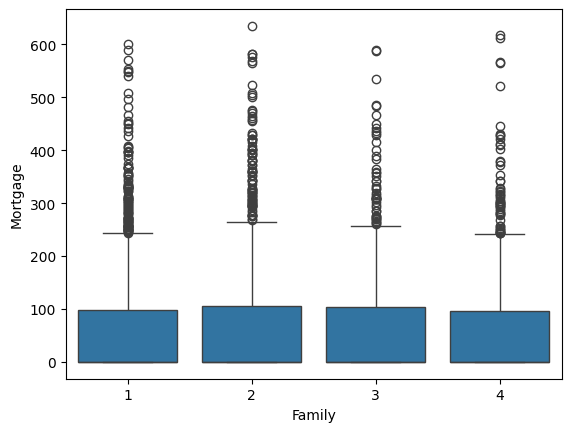

In [99]:
sns.boxplot(data=loan_df,x='Family',y='Mortgage')
plt.show()

Observations:
- There are outliers in Mortgage across all family size.

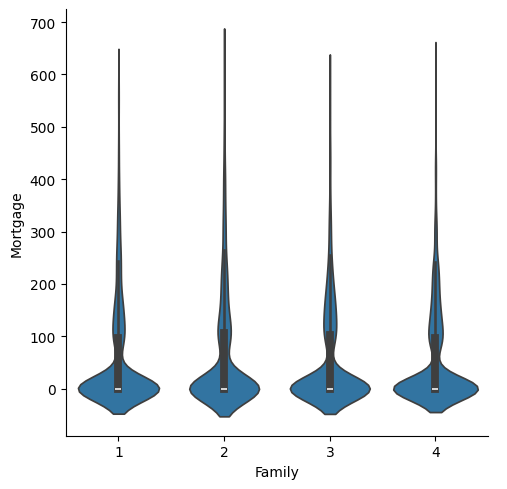

In [100]:
sns.catplot(data=loan_df,x='Family',y='Mortgage',kind='violin')
plt.show()

Observations:
- Distribution is very similar across all family sizes.

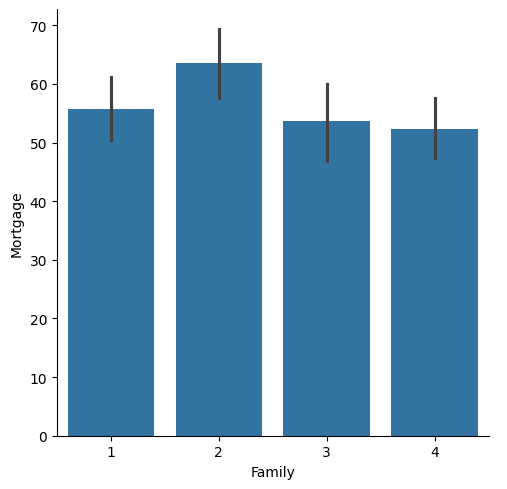

In [101]:
sns.catplot(data=loan_df,x='Family',y='Mortgage',kind='bar')
plt.show()

Observations:
- Avg Mortgage for family size 1,3 and 4 are pretty close to each other, around 54k.
- Family size of 2 has the highest Mortgage avg of around 62k.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**Missing Value treatment**

Answer:
  - Negative experience values were treated before analysis was done.
  - major_city missing values was treated with 'Unknown City' value when there were zipcodes which was not mapped to major_city.
  - There are no other missing values in the dataset.

In [102]:
loan_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Age_Group             0
major_city            0
dtype: int64

**Outlier detection and treatment**

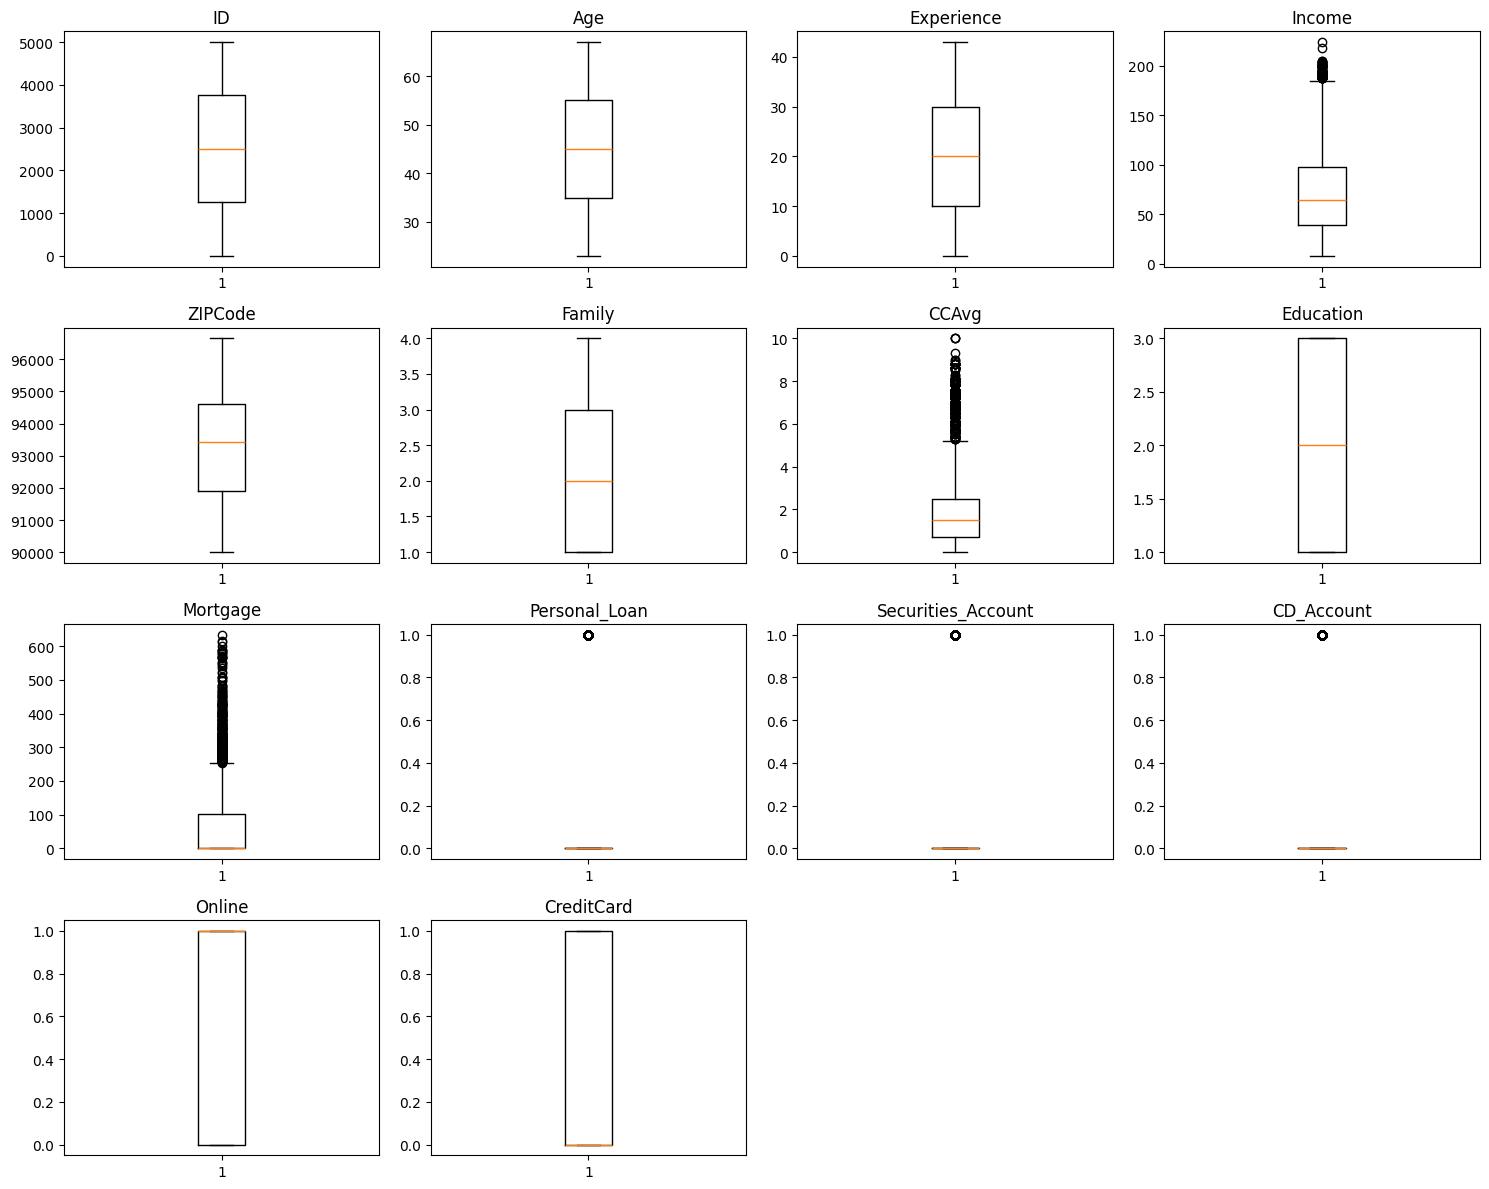

In [103]:
# outlier detection using boxplot
numeric_columns = loan_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(loan_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations:
 - There are outliers in income,CCAvg and Mortgage.
 - They are all valid values. So we will not treat them.

**Preparing data for modeling**

In [104]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   int64   
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   int64   
 10  Securities_Account  5000 non-null   int64   
 11  CD_Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
 14  Age_Group           5000 non-null   category
 15  major_city          5000 non-null   ob

In [105]:
#drop the age group since it was introduced for plotting purpose
loan_df_prep = loan_df.copy()
loan_df.drop('Age_Group',axis=1,inplace=True)

In [106]:
loan_df['ID'].nunique()

5000

In [107]:
#since ID is unique identifier, we can drop that
loan_df.drop('ID',axis=1,inplace=True)

In [108]:
#remove zipcode since we have major_city in the dataset
loan_df.drop('ZIPCode',axis=1,inplace=True)

In [109]:
loan_df['major_city'].nunique()

245

In [110]:
#X = pd.get_dummies(X, columns=['Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'major_city'], drop_first=True)


In [111]:
#Feature Engineering

#there are 245 unique major_cities in the dataset. one hot encoding(dummy) will create lot of columns
#So do frequency encoding where you replace city names with their frequencies.

# Calculate city frequencies
city_frequencies = loan_df['major_city'].value_counts(normalize=False).to_dict()

# Replace city names with their frequencies
loan_df['major_city_encoded'] = loan_df['major_city'].map(city_frequencies)

# Optionally, drop the original 'major_city' column
loan_df = loan_df.drop('major_city', axis=1)

In [112]:
loan_df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard  major_city_encoded  
0                   1           0       0           0                  71  
1                   1           0       0           0                 375  
2                   0           0       0           0                 241  
3                   0           0       0           0                 257  
4                   0           0       0           1                  46

In [113]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  major_city_encoded  5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [114]:
X = loan_df.drop(["Personal_Loan"], axis=1)
y = loan_df["Personal_Loan"]

In [115]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  major_city_encoded  
0                   1           0       0           0                  71  
1                   1           0       0           0                 375  
2                   0           0       0           0                 241  
3                   0           0       0           0                 257  
4                   0           0       0           1                  46

In [116]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [117]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [118]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.907714
1    0.092286
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895333
1    0.104667
Name: proportion, dtype: float64


Observations:
  - We had seen around 90.4% customers dont have personal loan and 9.6% have personal loan. The percentage is maintained in the training and test data set.

## Model Building

**Objective**
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and to identify which segment of customers to target more.

Model building - Decision Tree
- Define model evaluation criterion - Build the model and comment on the model performance. - Visualize the decision rules and important features

### Model Evaluation Criterion

**Model can make wrong predictions as:**
1. Predicting that a customer took the personal loan, in reality, the customer didn’t take the personal loan - FP
   - Models predicts that the customer took  the personal loan. There are attributes in the customer which makes the model to think that the customer took the personal loan
2. Predicting that a customer  didnt take the personal loan, in reality, the customer took the personal loan - FN

**Which case is more important?**
- Predicting that a customer took the personal loan,but in reality didnt take the personal loan are potential customers for conversion. The Model predicts that they have taken the personal loan since it finds attributes in the customer similar to those customers who have taken the loan.


**How to reduce this loss?**
- Maximize Precision to reduce False positives.

### Model Building

create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The make_confusion_matrix function will be used to plot confusion matrix.

In [119]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [120]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree(Default)**

In [121]:
# creating an instance of the decision tree model
model0 = DecisionTreeClassifier(random_state=42)    # random_state sets a seed value and enables reproducibility

# fitting the model to the training data
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

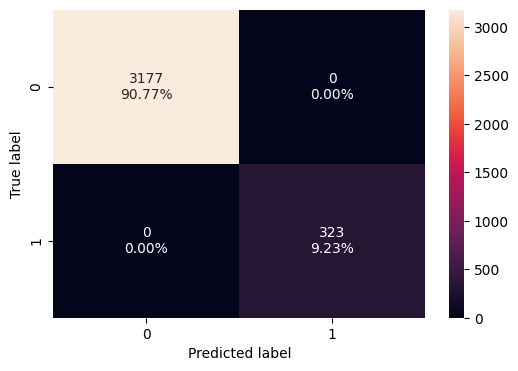

In [122]:
#create confusion matrix for the training data
confusion_matrix_sklearn(model0, X_train, y_train)

In [123]:
#get the various scores for decision tree(default model) - training data
decision_tree_default_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_default_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

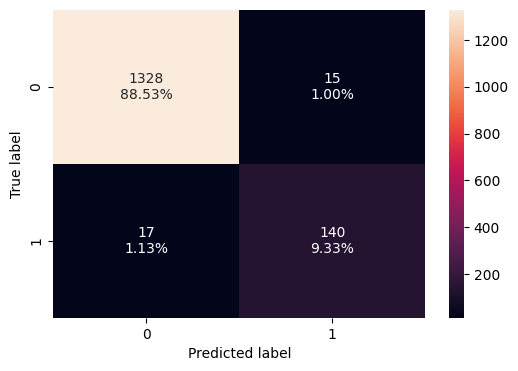

In [124]:
#get confusion matrix for test data
confusion_matrix_sklearn(model0, X_test, y_test)

In [125]:
#get various scores for test data
decision_tree_default_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_default_perf_test

Accuracy   Recall  Precision        F1
0  0.978667  0.89172   0.903226  0.897436

**Observations:**
- Although the values of Accuracy,Recall,Precision and F1 is high, its still lower than the values on the training data which suggests there's some overfitting.


**Visualizing the Decision Tree(Default)**

In [126]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'major_city_encoded']


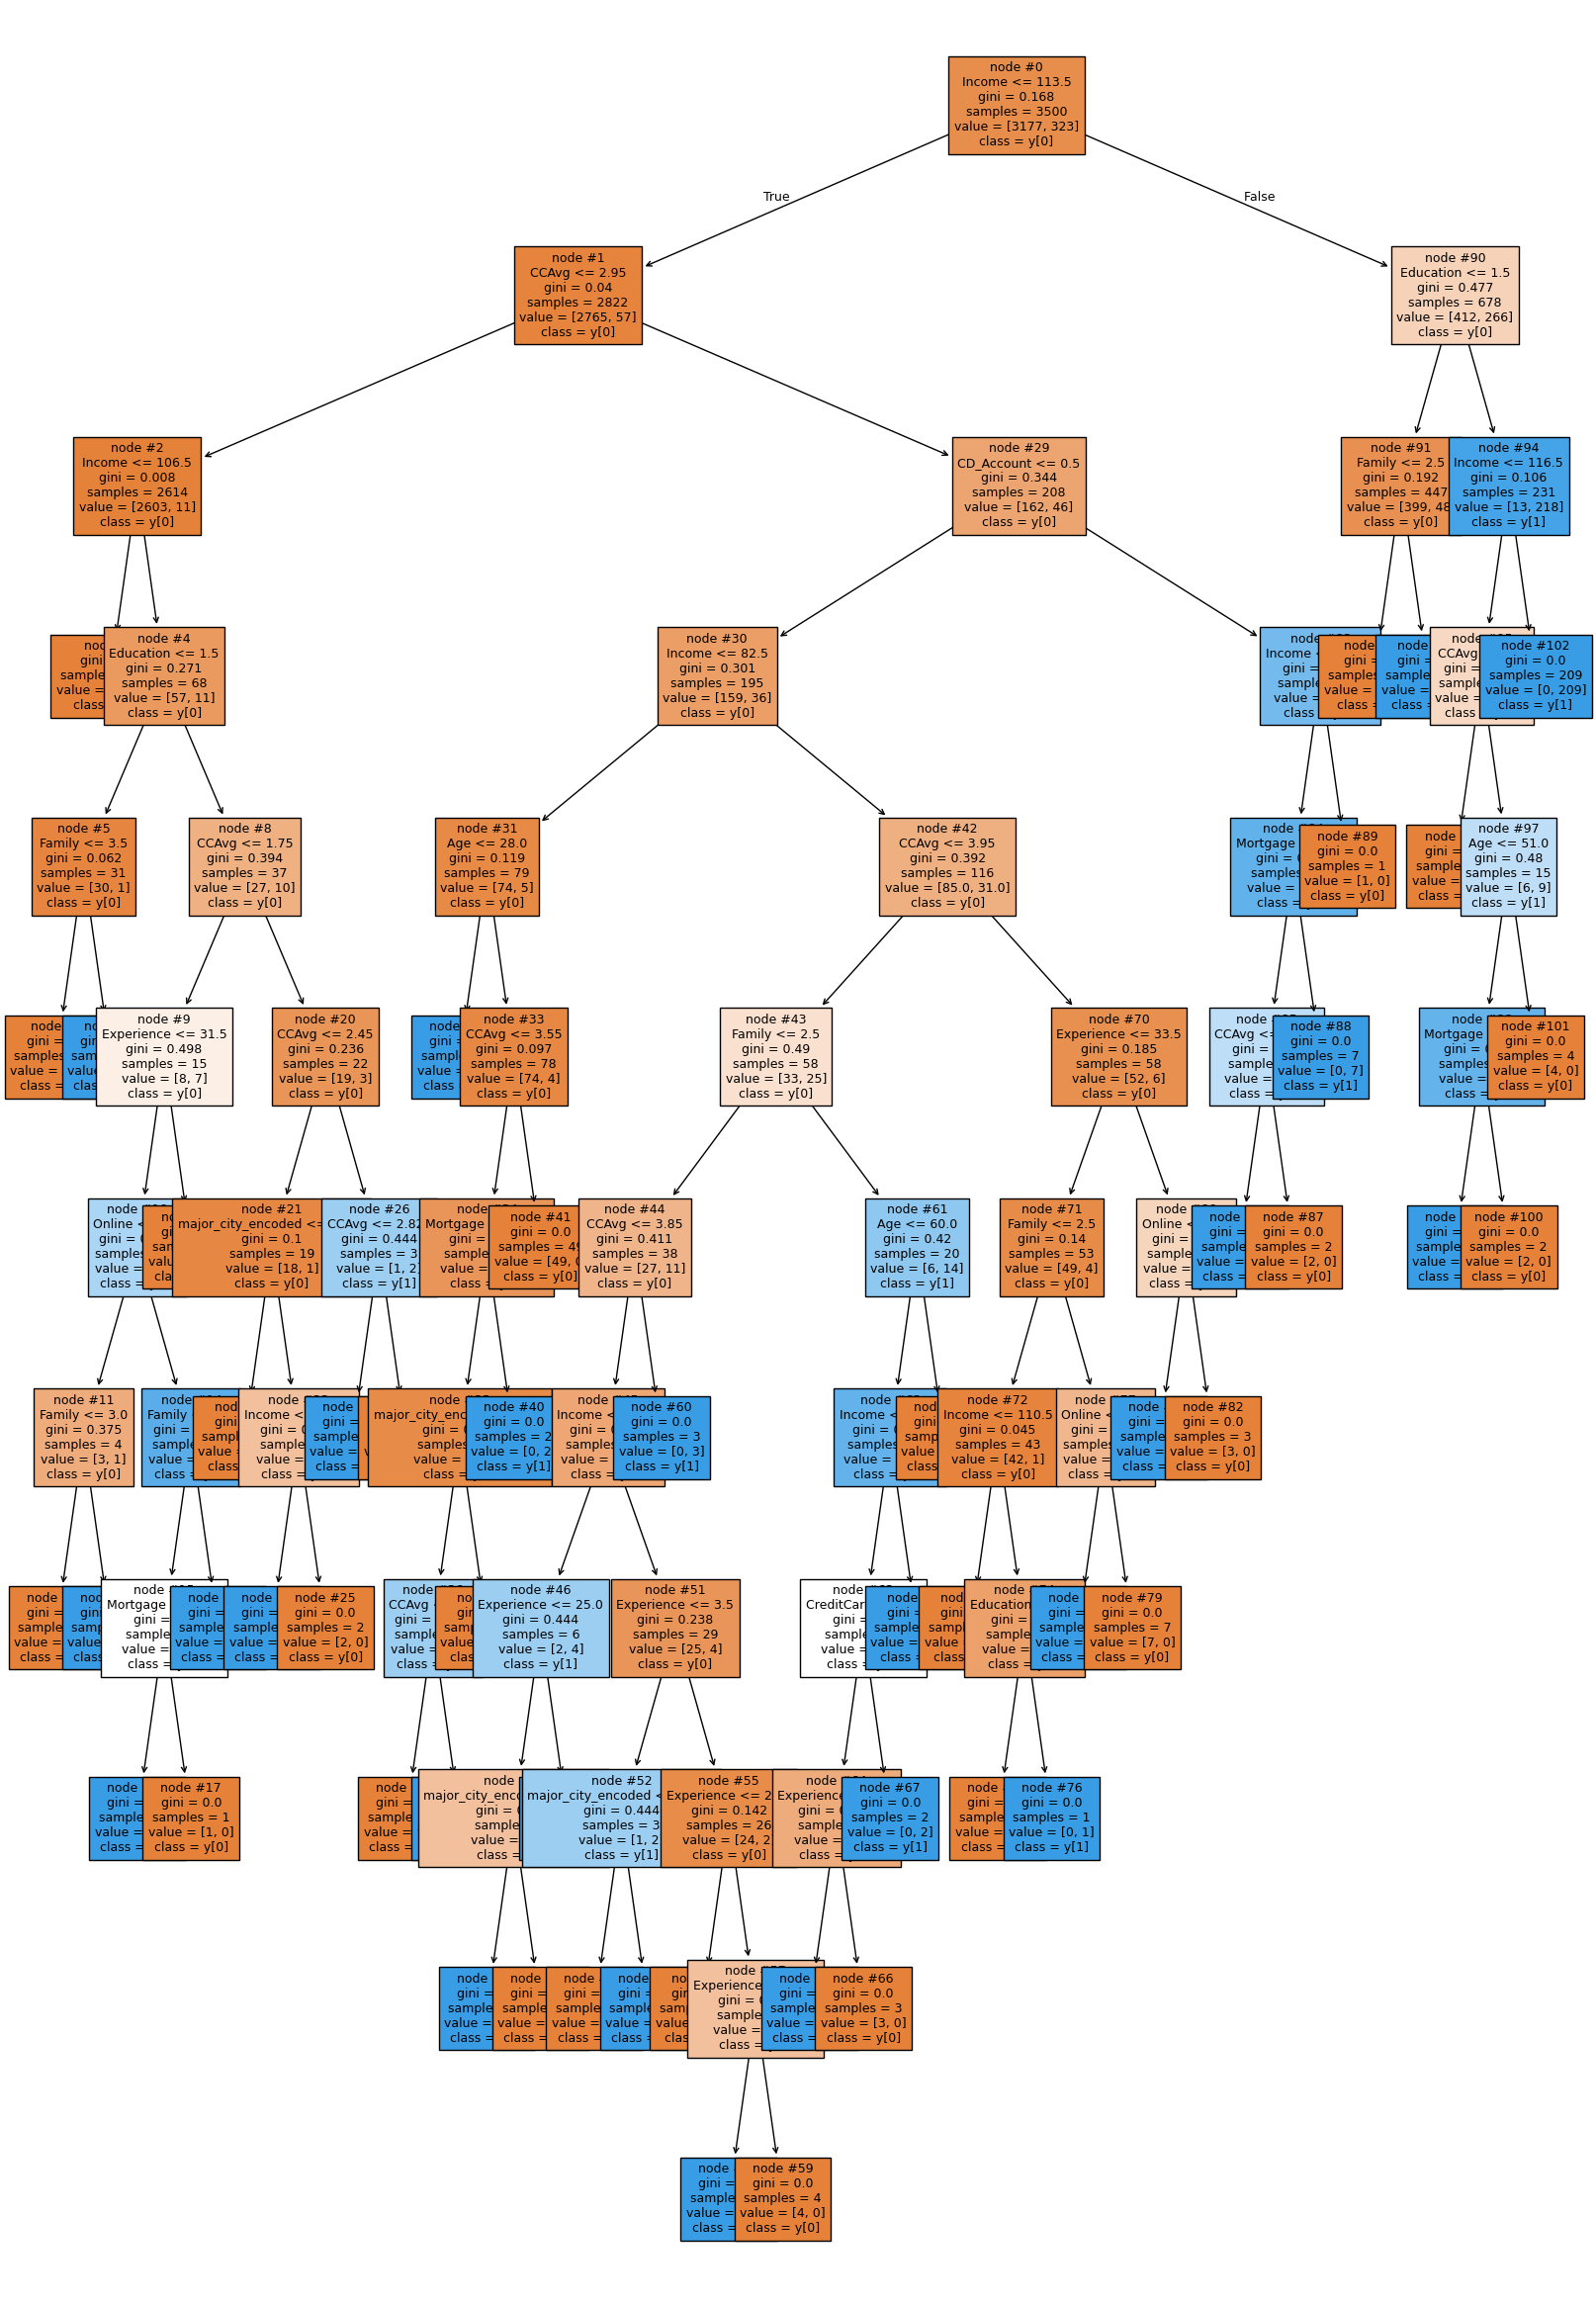

In [127]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [128]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- weights: [30.00, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- CCAvg <= 1.75
|   |   |   |   |   |--- Experience <= 31.50
|   |   |   |   |   |   |--- Online <= 0.50
|   |   |   |   |   |   |   |--- Family <= 3.00
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Family >  3.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Online >  0.50
|   |   |   |   |   |   |   |--- Family <= 1.50
|   |   |   |   |   |   |   |   |--- Mortgage <= 80.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   | 

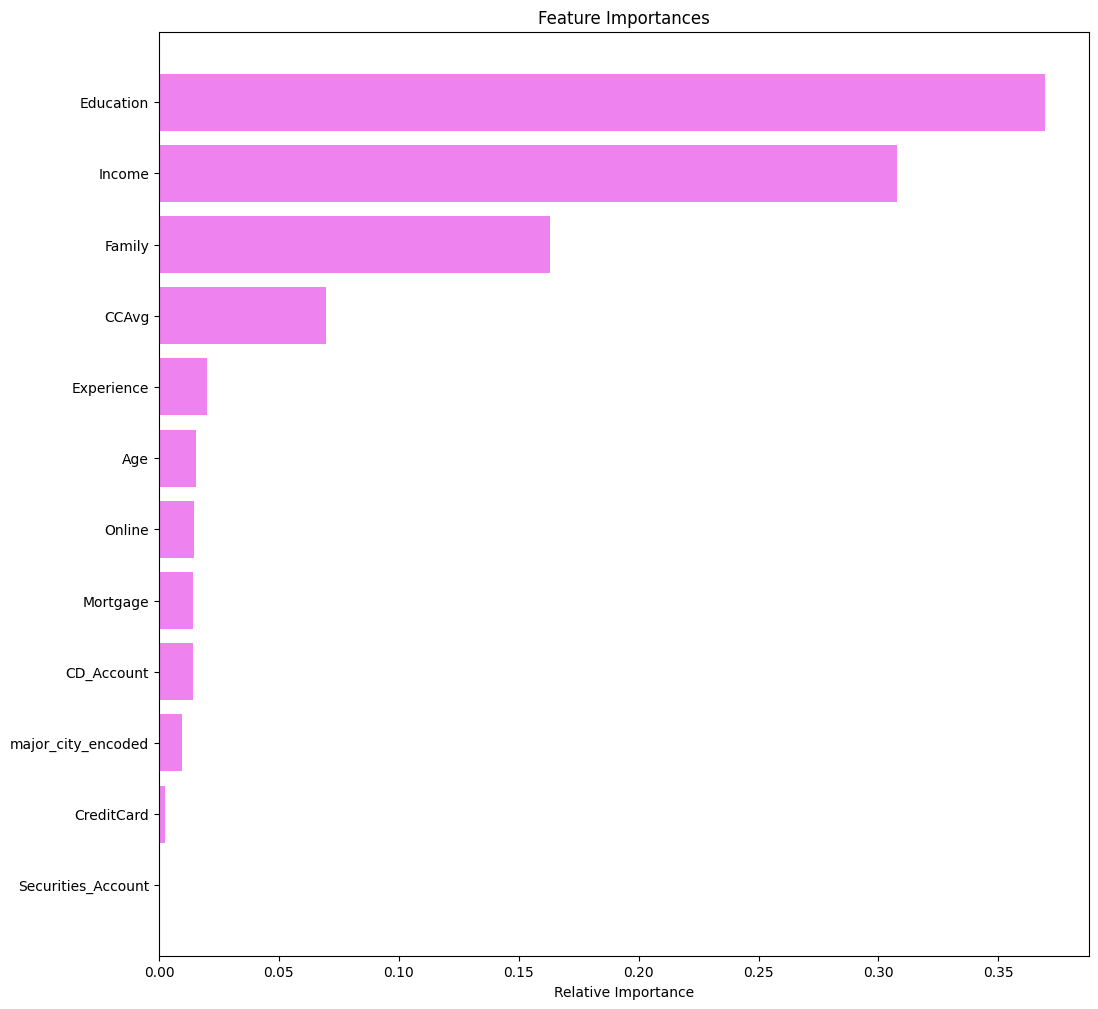

In [129]:
# identify the key features for decision tree(default) model
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
 - Education, Income and Family are the top 3 important features.

**Decision Tree(with ClassWeights)**
 - 90.4% customers dont have personal loan and 9.6% have personal loan.

 - If the frequency of one class,say class A is 9.6% and the frequency of class B is 90.4%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

 - In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data.

 - class_weight is a hyperparameter for the decision tree classifier.

In [130]:
model1 = DecisionTreeClassifier(random_state=42, class_weight="balanced")
model1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

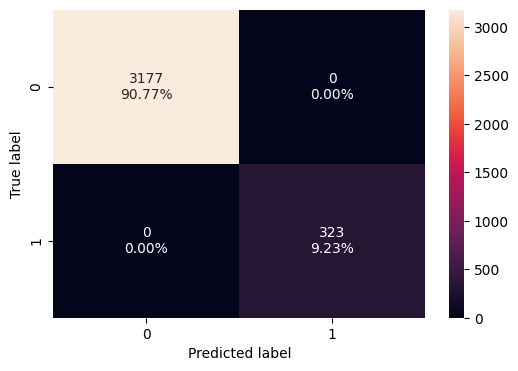

In [131]:
#create the confusion matrix for training data
confusion_matrix_sklearn(model1, X_train, y_train)

In [132]:
#get the scores for training data(model - decision tree with class_weight)
decision_tree_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

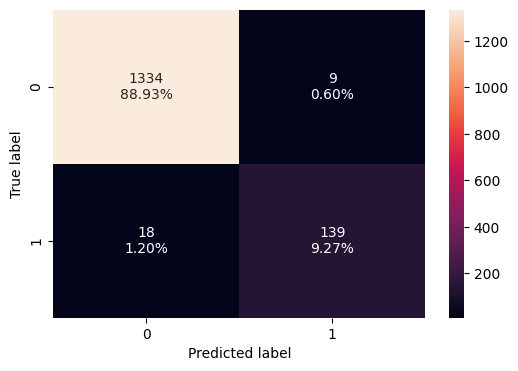

In [133]:
#create the confusion matrix for test data(model - decision tree with class_weight)
confusion_matrix_sklearn(model1, X_test, y_test)

In [134]:
#get the scores for test data(model - decision tree with class_weight)
decision_tree_perf_test = model_performance_classification_sklearn(
    model1, X_test, y_test
)
decision_tree_perf_test

Accuracy   Recall  Precision        F1
0     0.982  0.88535   0.939189  0.911475

Observations:
- The precision score of decision tree with class_weight is better than default decision tree.




**Visualizing the Decision Tree**

In [135]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'major_city_encoded']


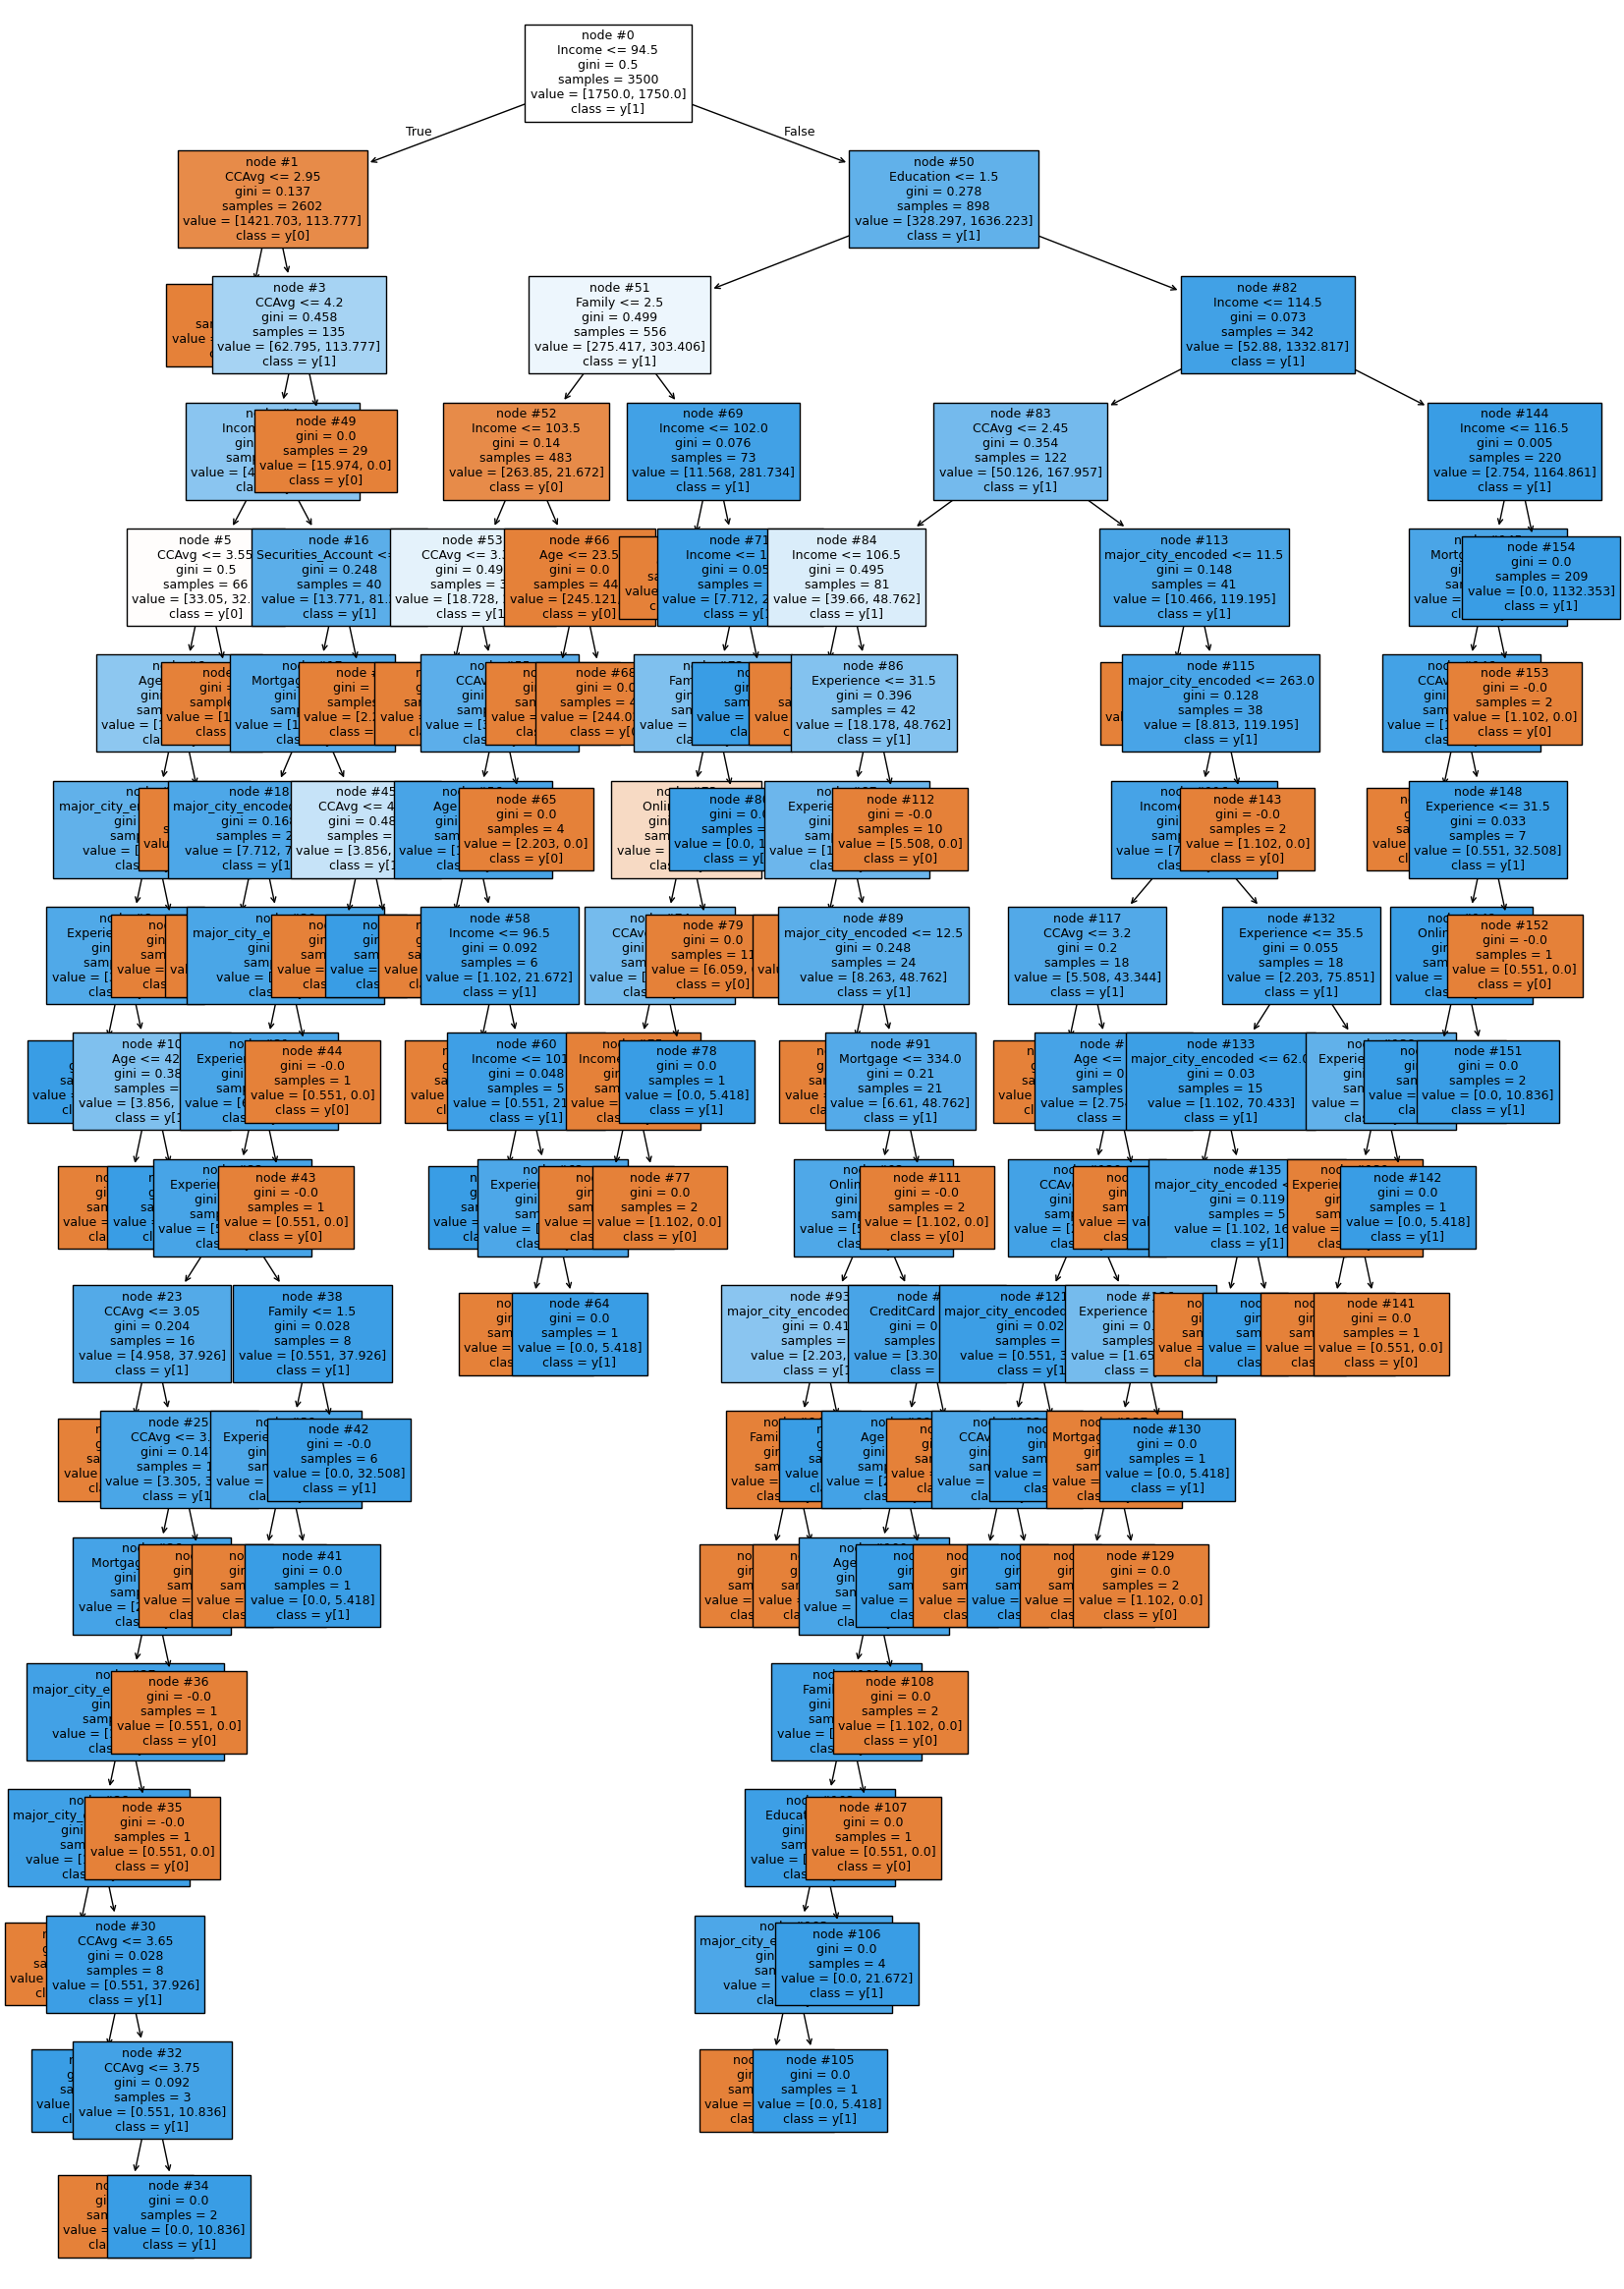

In [136]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**
- This is a complex tree.

In [137]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1358.91, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Age <= 47.00
|   |   |   |   |   |   |--- major_city_encoded <= 119.50
|   |   |   |   |   |   |   |--- Experience <= 8.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 21.67] class: 1
|   |   |   |   |   |   |   |--- Experience >  8.50
|   |   |   |   |   |   |   |   |--- Age <= 42.00
|   |   |   |   |   |   |   |   |   |--- weights: [3.86, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- Age >  42.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 10.84] class: 1
|   |   |   |   |   |   |--- major_city_encoded >  119.50
|   |   |   |   |   |   |   |--- weights: [2.75, 0.00] class: 0
|   |   |   |   |   |--- Age >  47.00
|   |   |   |   |   |   |--- weights: [7.16, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |-

**Observations:**
- This is complex decision rules.

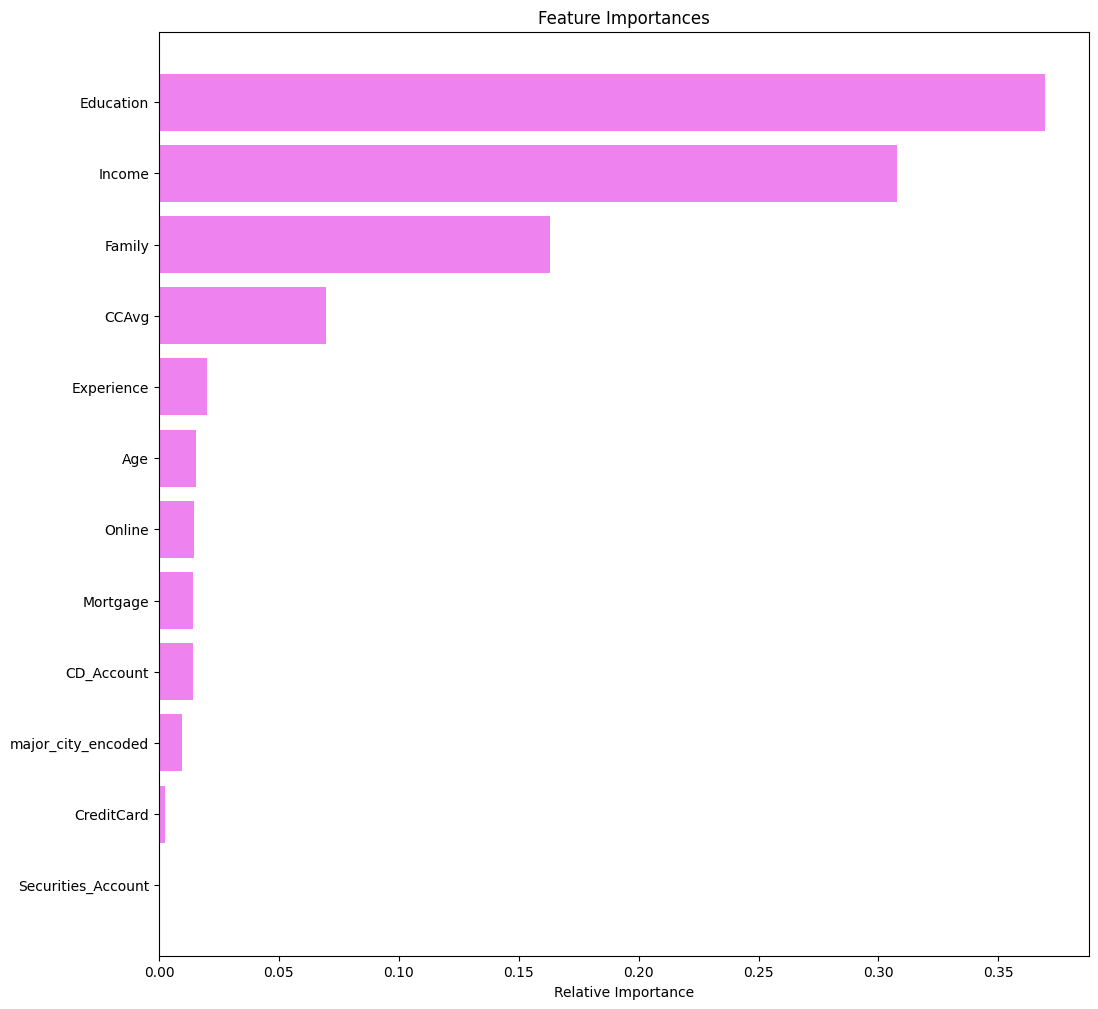

In [138]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- Education, Income and Family are the top 3 important features.

## Model Performance Improvement

****

* Hyperparameter tuning is crucial because it directly affects the performance of a model.
* Unlike model parameters which are learned during training, hyperparameters need to be set before training.
* Effective hyperparameter tuning helps in improving the performance and robustness of the model.
* The below custom loop for hyperparameter tuning iterates over predefined parameter values to identify the best model based on the metric of choice (Precision score).

In [139]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )
            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate precision scores for training and test sets
            train_precision_score = precision_score(y_train, y_train_pred)
            test_precision_score = precision_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test precision scores
            score_diff = abs(train_precision_score - test_precision_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_precision_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_precision_score
                best_estimator = estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test precision score: {best_test_score}")

Best parameters found:
Max depth: 4
Max leaf nodes: 50
Min samples split: 30
Best test precision score: 0.9784172661870504


In [140]:
# creating an instance of the best model
model2 = best_estimator

# fitting the best model to the training data
model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=30,
                       random_state=42)

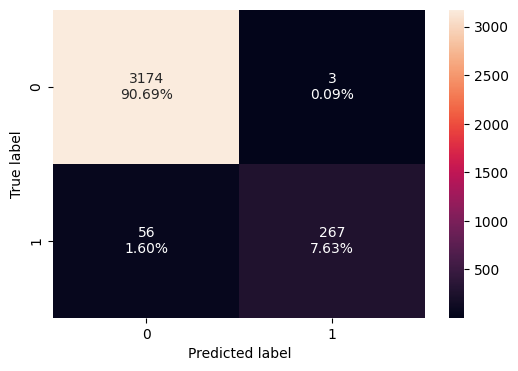

In [141]:
#creating the confusion matrix for training data
confusion_matrix_sklearn(model2, X_train, y_train)

In [142]:
#get various scores for training data
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model2, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.983143  0.826625   0.988889  0.900506

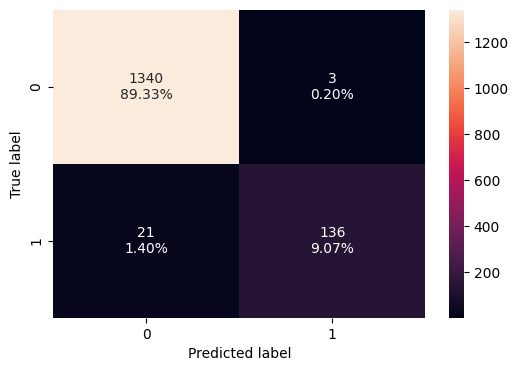

In [143]:
#create confusion matrix for test data
confusion_matrix_sklearn(model2, X_test, y_test)

In [144]:
#get various scores for test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    model2, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0     0.984  0.866242   0.978417  0.918919

Observations:
- Decision tree(pre-pruning) without class_weight model has better precision score when compared with the default models.

In [145]:
feature_names = list(X_train.columns)
importances = model2.feature_importances_
indices = np.argsort(importances)

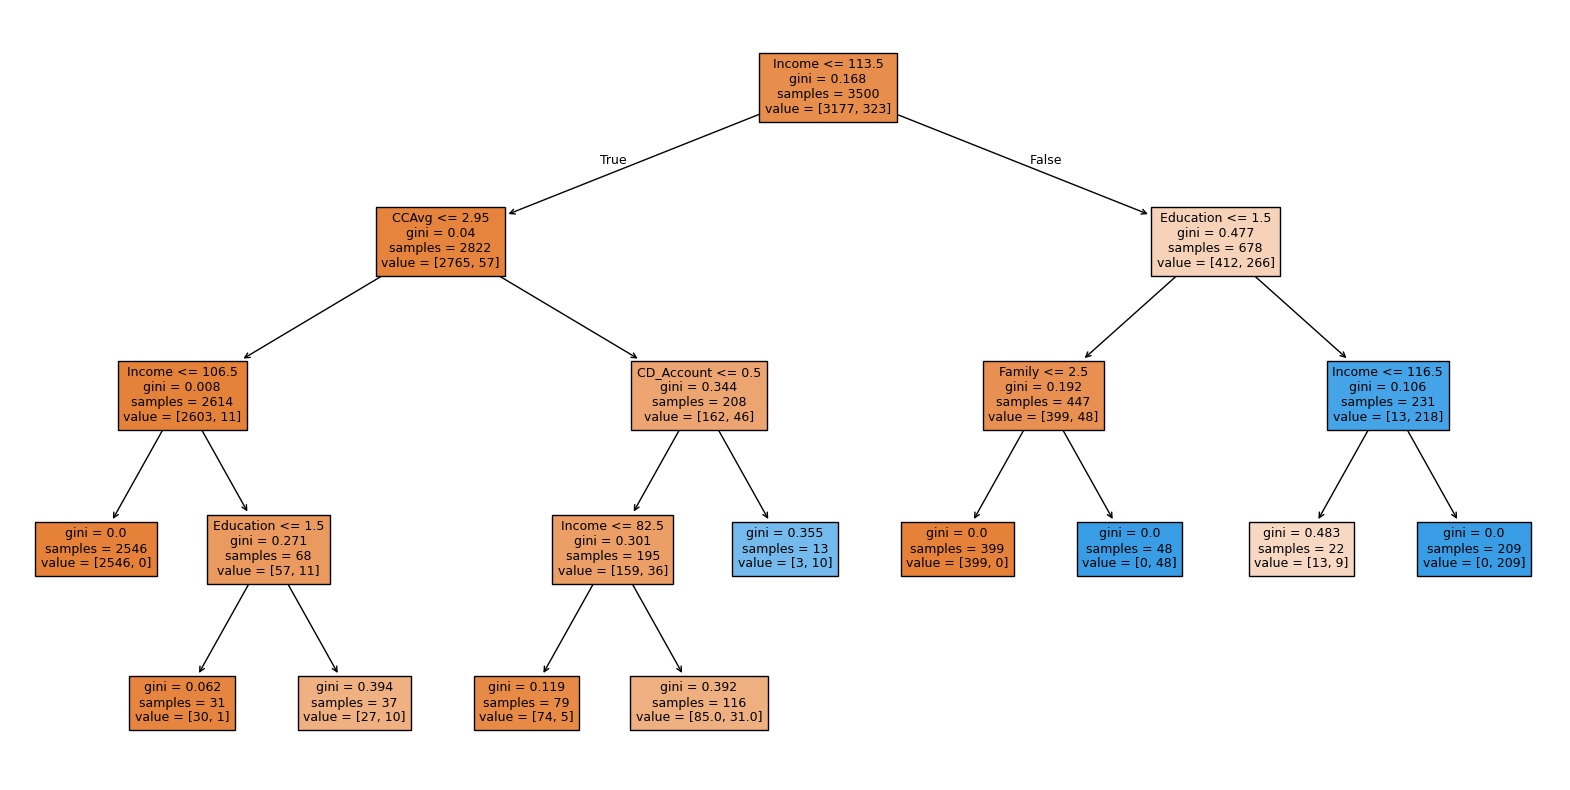

In [146]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [147]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model2, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2546.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [30.00, 1.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [27.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- weights: [74.00, 5.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- weights: [85.00, 31.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 10.00] class: 1
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- w

**Observations:**
- The decision tree is relatively simple.
- The decision rules above uses Income,CCAvg,Education,Family  and CD_Account variables.

In [148]:
importances = model2.feature_importances_
importances

array([0.        , 0.        , 0.34549992, 0.17144994, 0.03628648,
       0.43009557, 0.        , 0.        , 0.01666809, 0.        ,
       0.        , 0.        ])

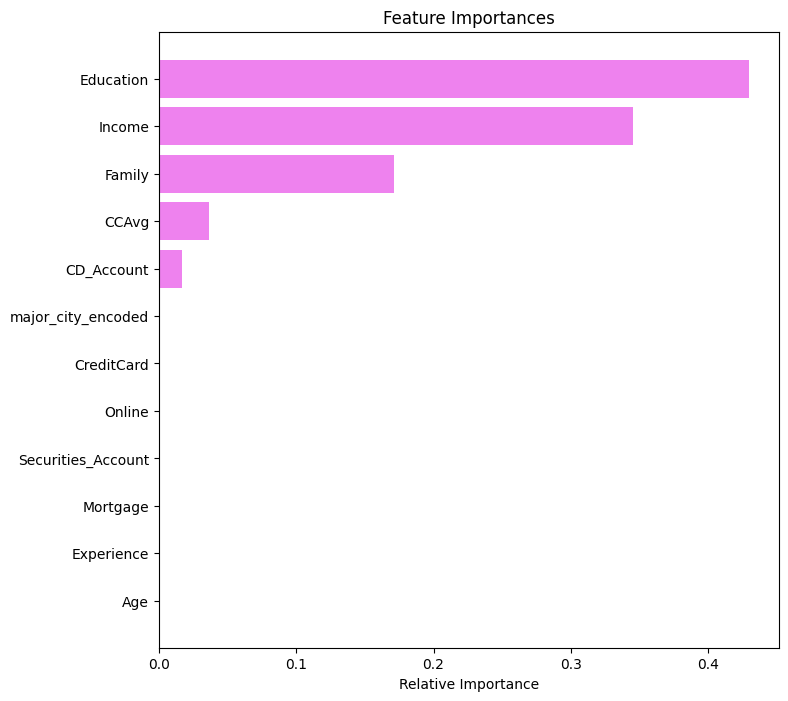

In [149]:
# importance of features in the tree building

importances = model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
 - In Pre-Pruned Decision Tree without class_weight, Income,Education and CCAvg are the most important features.

**Decision Tree(Pre-Pruning) - with class weight**

In [150]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]

# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:
            # Initialize the tree with the current set of parameters
            estimator1 = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )
            # Fit the model to the training data
            estimator1.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator1.predict(X_train)
            y_test_pred = estimator1.predict(X_test)

            # Calculate precision scores for training and test sets
            train_precision_score = precision_score(y_train, y_train_pred)
            test_precision_score = precision_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test precision scores
            score_diff = abs(train_precision_score - test_precision_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_precision_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_precision_score
                best_estimator1 = estimator1

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator1.max_depth}")
print(f"Max leaf nodes: {best_estimator1.max_leaf_nodes}")
print(f"Min samples split: {best_estimator1.min_samples_split}")
print(f"Best test precision score: {best_test_score}")

Best parameters found:
Max depth: 6
Max leaf nodes: 50
Min samples split: 10
Best test precision score: 0.8076923076923077


In [151]:
# creating an instance of the best model
model3 = best_estimator1

# fitting the best model to the training data
model3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=42)

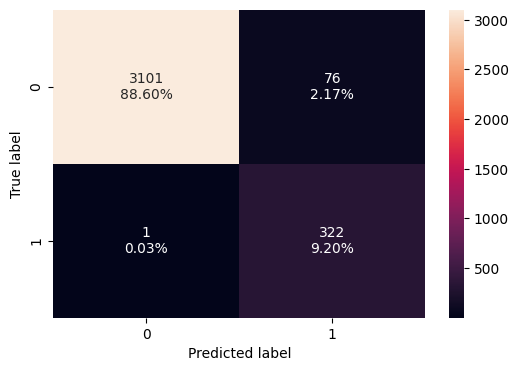

In [152]:
#create confusion matrix for training data
confusion_matrix_sklearn(model3, X_train, y_train)

In [153]:
#get various scores for training data
decision_tree_tune_perf_train1 = model_performance_classification_sklearn(
    model3, X_train, y_train
)
decision_tree_tune_perf_train1

Accuracy    Recall  Precision        F1
0     0.978  0.996904   0.809045  0.893204

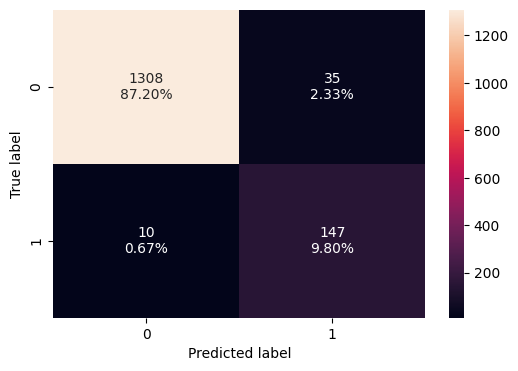

In [154]:
#create confusion matrix for test data
confusion_matrix_sklearn(model3, X_test, y_test)

In [155]:
#get various scores for test data
decision_tree_tune_perf_test1 = model_performance_classification_sklearn(
    model3, X_test, y_test
)
decision_tree_tune_perf_test1

Accuracy    Recall  Precision        F1
0      0.97  0.936306   0.807692  0.867257

**Observations:**
- Decision Tree(Pre-Pruning) without class weights has better precision score when compared with Decision Tree(Pre-pruning) with class weights.

In [156]:
feature_names = list(X_train.columns)
importances = model3.feature_importances_
indices = np.argsort(importances)

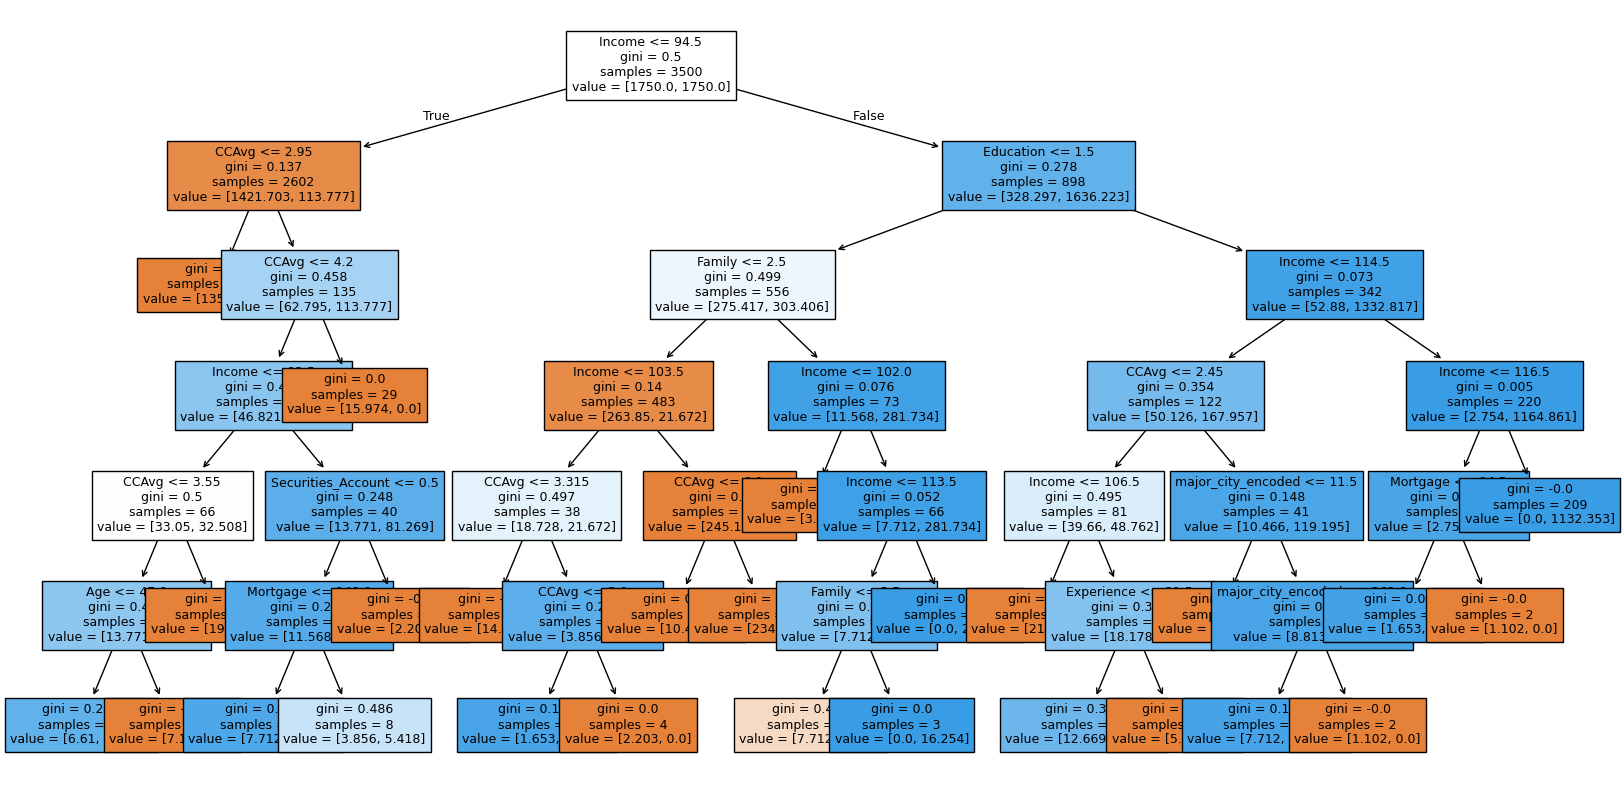

In [157]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    model3,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [158]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model3, feature_names=feature_names, show_weights=True))

|--- Income <= 94.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1358.91, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- Income <= 82.50
|   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |--- Age <= 47.00
|   |   |   |   |   |   |--- weights: [6.61, 32.51] class: 1
|   |   |   |   |   |--- Age >  47.00
|   |   |   |   |   |   |--- weights: [7.16, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.55
|   |   |   |   |   |--- weights: [19.28, 0.00] class: 0
|   |   |   |--- Income >  82.50
|   |   |   |   |--- Securities_Account <= 0.50
|   |   |   |   |   |--- Mortgage <= 149.00
|   |   |   |   |   |   |--- weights: [7.71, 75.85] class: 1
|   |   |   |   |   |--- Mortgage >  149.00
|   |   |   |   |   |   |--- weights: [3.86, 5.42] class: 1
|   |   |   |   |--- Securities_Account >  0.50
|   |   |   |   |   |--- weights: [2.20, 0.00] class: 0
|   |   |--- CCAvg >  4.20
|   |   |   |--- weights: [15.97, 0.00] class: 0
|--- Income >  94.50
|   |--- Ed

Observations:
- This tree is relatively complex. It uses several variables like Education,Family, Income,Securities_Account,Mortgage CCAvg,Experience,Income,Mortgage.

In [159]:
importances = model3.feature_importances_
importances

array([0.00499611, 0.00380679, 0.63941803, 0.13832861, 0.11296537,
       0.09347228, 0.00219924, 0.00197131, 0.        , 0.        ,
       0.        , 0.00284225])

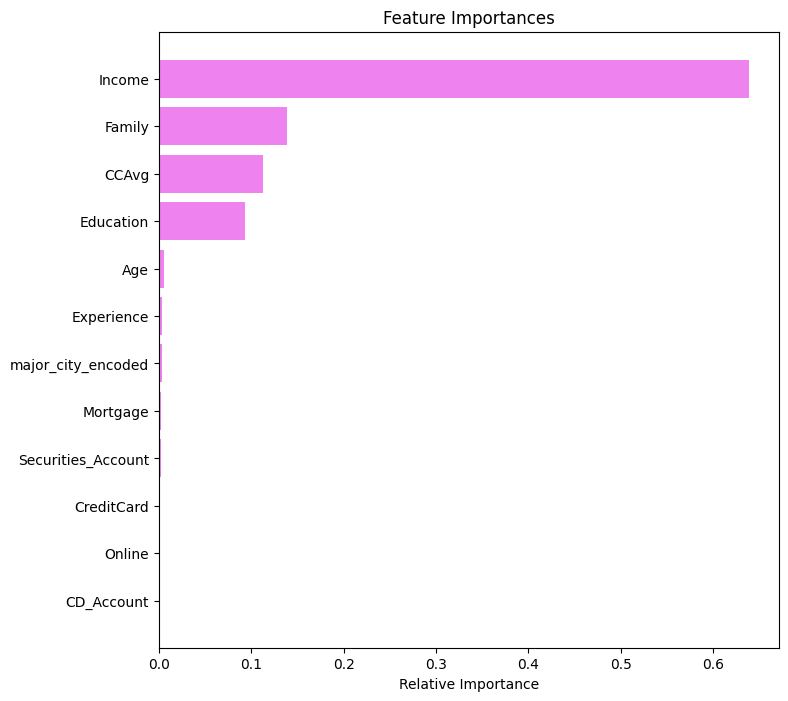

In [160]:
# importance of features in the tree building

importances = model3.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- In Decision Tree(pre-pruning) with class weights, Income,Family and CCAvg are the top 3 important features.

**Decision Tree(Post Pruning) without class weight**

In [161]:
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [162]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000245    0.000490
2     0.000271    0.001031
3     0.000279    0.001589
4     0.000381    0.001970
5     0.000381    0.002351
6     0.000381    0.003113
7     0.000381    0.003494
8     0.000429    0.003923
9     0.000429    0.004780
10    0.000440    0.006098
11    0.000527    0.007153
12    0.000535    0.007688
13    0.000536    0.008224
14    0.000553    0.008777
15    0.000555    0.009332
16    0.000558    0.009890
17    0.000574    0.012185
18    0.000594    0.013966
19    0.000629    0.016482
20    0.000794    0.017276
21    0.000935    0.018211
22    0.000940    0.019151
23    0.000988    0.020139
24    0.000990    0.021129
25    0.001052    0.023233
26    0.001262    0.024495
27    0.001448    0.027391
28    0.002380    0.029771
29    0.003972    0.033742
30    0.005182    0.038924
31    0.024483    0.063407
32    0.052065    0.167538

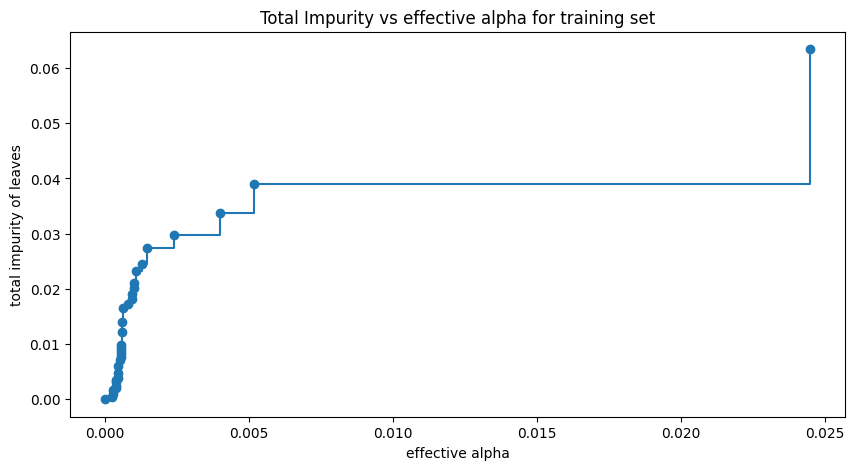

In [163]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [164]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05206542558865251


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

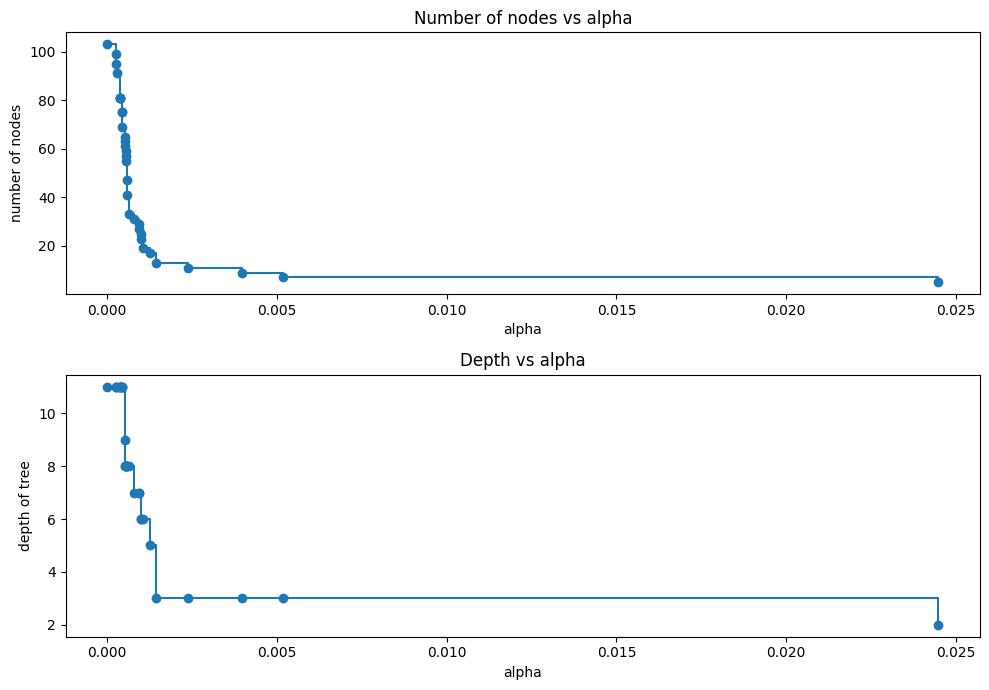

In [165]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [166]:
precision_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train.append(values_train)

In [167]:
precision_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test.append(values_test)

In [168]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

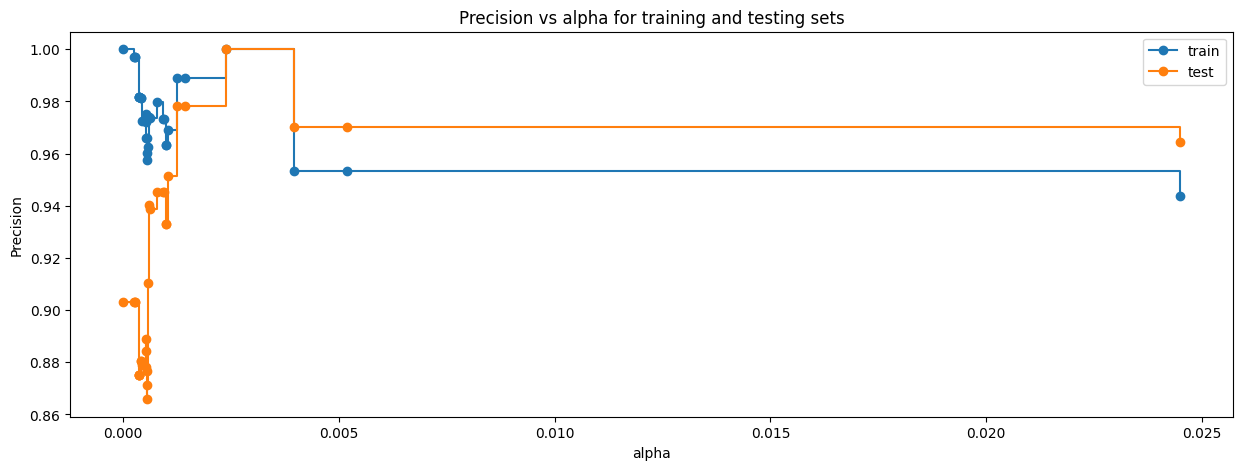

In [169]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [170]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.002380219780219777, random_state=42)


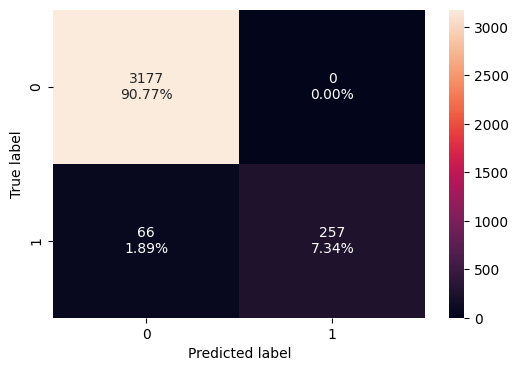

In [171]:
#create confusion matrix for training data
model4 = best_model
confusion_matrix_sklearn(model4, X_train, y_train)

In [172]:
#get various scores for training data
decision_tree_post_perf_train = model_performance_classification_sklearn(
    model4, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.981143  0.795666        1.0  0.886207

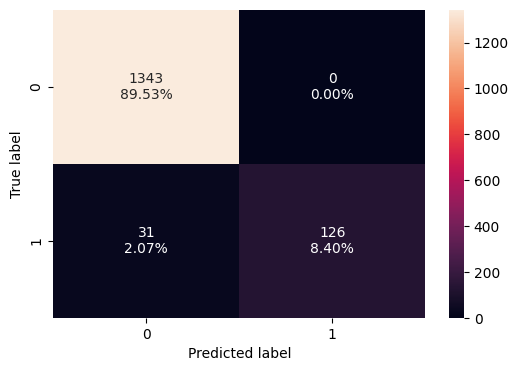

In [173]:
#create confusion matrix for test data
confusion_matrix_sklearn(model4, X_test, y_test)

In [174]:
#get various scores for test data
decision_tree_post_test = model_performance_classification_sklearn(
    model4, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.979333  0.802548        1.0  0.890459

Observations:
-  Decision tree(post pruning) without class weights has the Precision score on test data  same as in training data. This model has the highest precision score of 1.0
- A precision of 1.0 indicates that every instance that the model predicted as a personal loan taker is infact a loan taker. This means there are no FPs in the model's prediction in the test data.
- However we see that the recall score is lower when compared to other models.

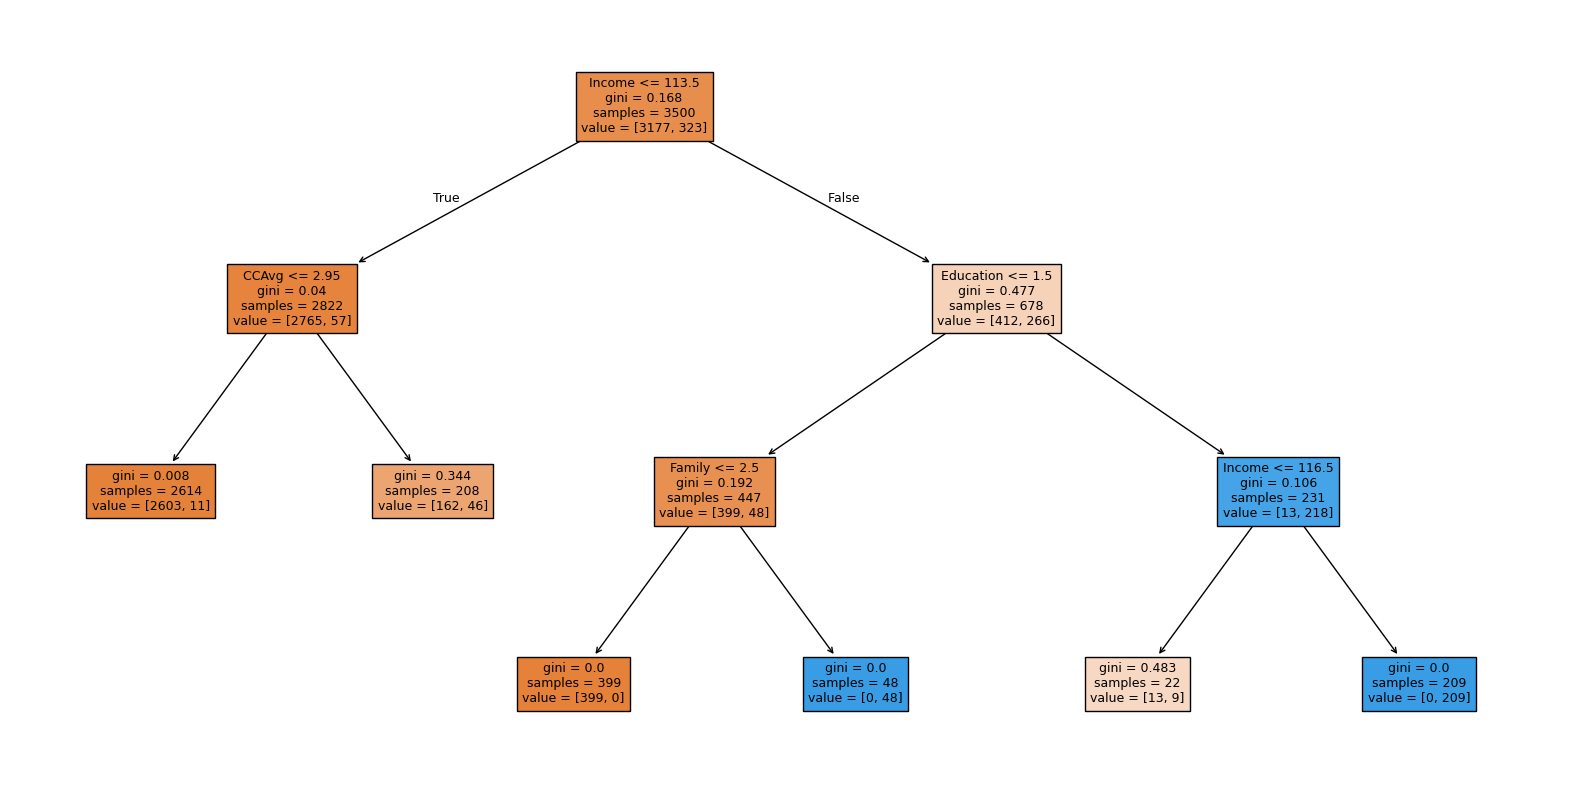

In [175]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    model4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Observations:**
 - The Decision tree is very simple. The features used are Income,CCAvg,Education and Family

In [176]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model4, feature_names=feature_names, show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2603.00, 11.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [162.00, 46.00] class: 0
|--- Income >  113.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [399.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 48.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [13.00, 9.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 209.00] class: 1



**Observations:**
- Based on the above decision rules, we can make the following interpretation:
    - If Income is less than or equal to 113.50, irrespective of CCAvg, the customer  will not take personal loan.
    - If Income is more than 113.50, education is less than graduate degree
      - If Family size is less than or equal to 2.5, customer will not take personal loan
      - If family size is more than 2.5, customer will take personal loan.
    -  If Income is more than 113.50 and less than or equal to 116.50,
      - If education is graduate degree or more, the customer will not take a personal loan
    - If income is more than 116.50,
      - If education is graduate degree or more, the customer will take a personal loan.

In [177]:
importances = model4.feature_importances_
indices = np.argsort(importances)

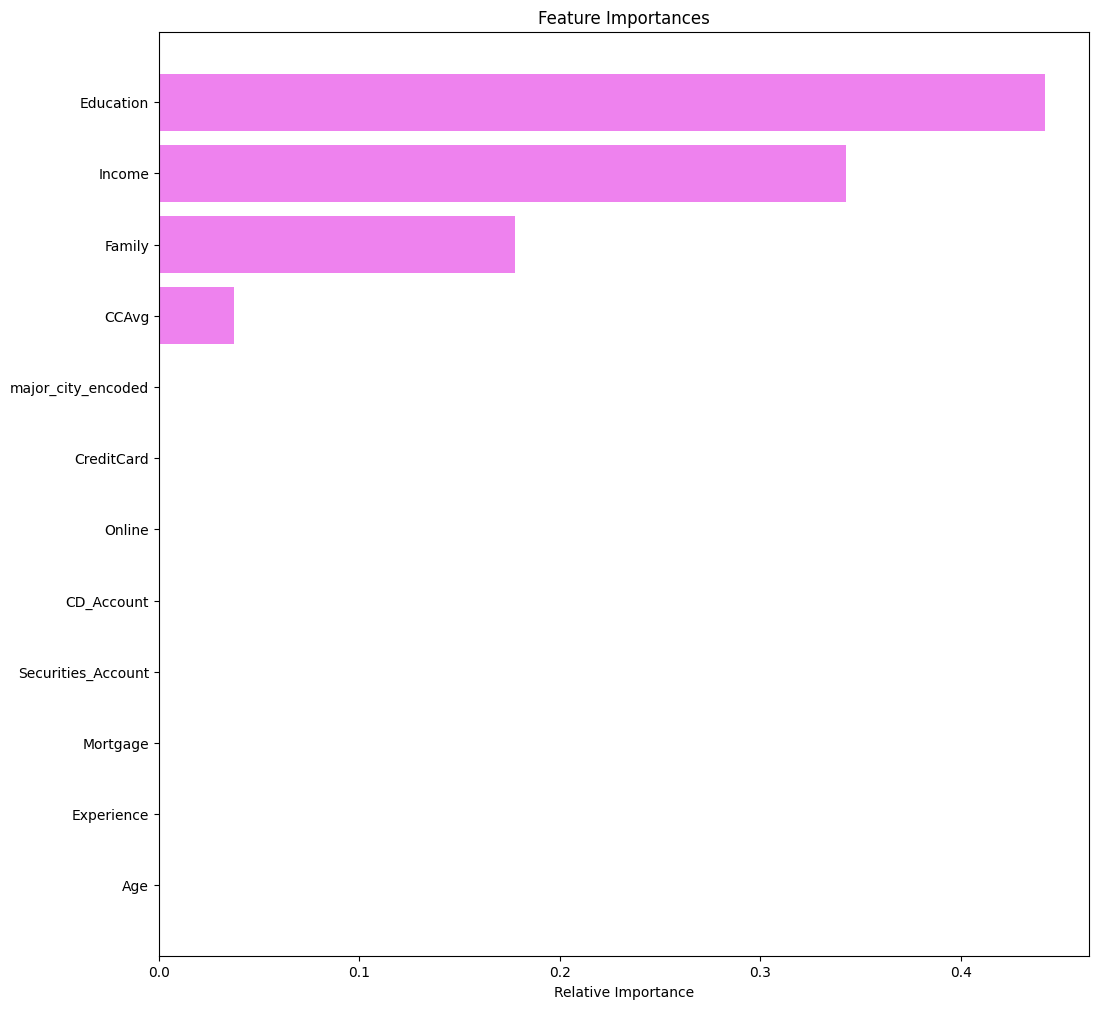

In [178]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
- Education, Income and Family are the top 3  important features.

**Decision Tree(post pruning) with class weight**

In [179]:
clf1 = DecisionTreeClassifier(random_state=42, class_weight="balanced")
path1 = clf1.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path1.ccp_alphas), path1.impurities

In [180]:
pd.DataFrame(path1)

ccp_alphas    impurities
0   0.000000e+00 -4.520215e-16
1   1.747282e-19 -4.518468e-16
2   2.096738e-19 -4.516371e-16
3   2.096738e-19 -4.514274e-16
4   3.494564e-19 -4.510780e-16
5   4.124668e-18 -4.469533e-16
6   5.831554e-16  1.362021e-16
7   1.534802e-04  3.069603e-04
8   1.542448e-04  6.154500e-04
9   1.551281e-04  9.257061e-04
10  1.551281e-04  1.235962e-03
11  1.551281e-04  1.546219e-03
12  2.852125e-04  2.116644e-03
13  2.932212e-04  2.996307e-03
14  2.964344e-04  3.292742e-03
15  2.966094e-04  3.885960e-03
16  3.058772e-04  5.109469e-03
17  3.095177e-04  5.418987e-03
18  3.898421e-04  6.588513e-03
19  3.948401e-04  8.562714e-03
20  4.201939e-04  9.823296e-03
21  5.256235e-04  1.034892e-02
22  5.320267e-04  1.247703e-02
23  6.620551e-04  1.446319e-02
24  7.110732e-04  1.517426e-02
25  7.235890e-04  1.589785e-02
26  8.083008e-04  1.670615e-02
27  8.931996e-04  1.849255e-02
28  9.424721e-04  1.943503e-02
29  9.848520e-04  2.140473e-02
30  9.931470e-04  2.239788e-02
31  1.094829e-03  2.349271e-02
32  1.169192e-03  2.466190e-02
33  1.235424e-03  2.713275e-02
34  1.709165e-03  2.884191e-02
35  1.820005e-03  3.066192e-02
36  2.060051e-03  3.272197e-02
37  2.388612e-03  3.511058e-02
38  3.349149e-03  4.180888e-02
39  3.870286e-03  4.567917e-02
40  4.167044e-03  4.984621e-02
41  4.497746e-03  5.884170e-02
42  5.434215e-03  6.427592e-02
43  5.703111e-03  6.997903e-02
44  3.707619e-02  1.070552e-01
45  5.469545e-02  2.164461e-01
46  2.835539e-01  5.000000e-01

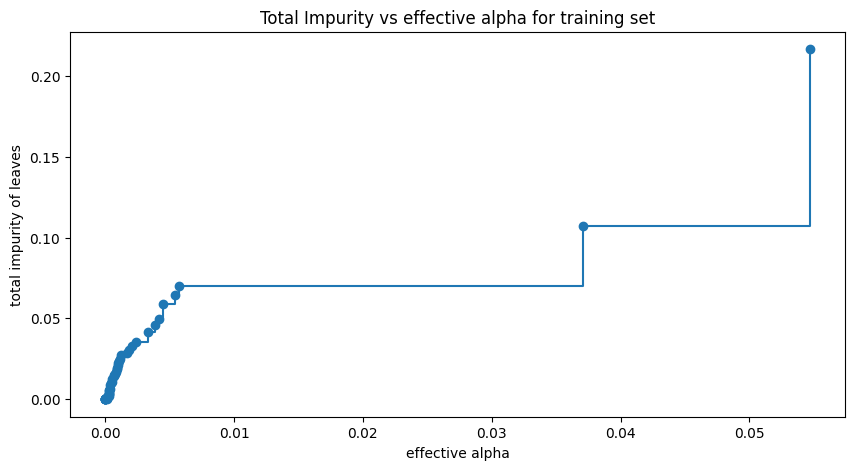

In [181]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs1[-1]``, with one node.

In [182]:
clfs1 = []
for ccp_alpha in ccp_alphas:
    clf1 = DecisionTreeClassifier(
        random_state=42, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf1.fit(X_train, y_train)
    clfs1.append(clf1)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs1[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2835538739883261


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

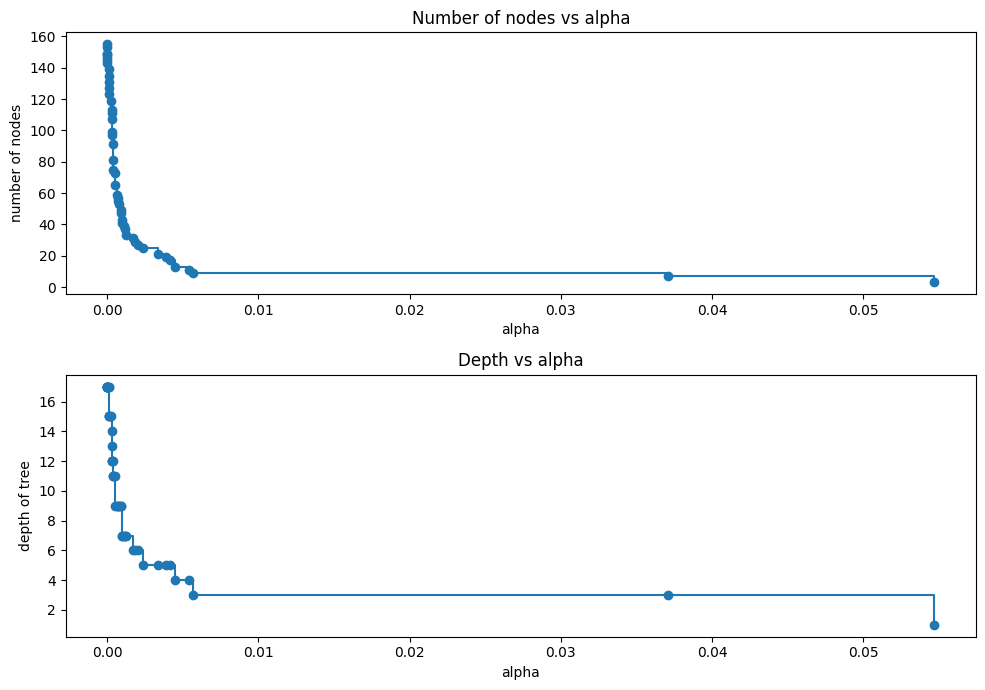

In [183]:
clfs1 = clfs1[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf1.tree_.node_count for clf1 in clfs1]
depth = [clf1.tree_.max_depth for clf1 in clfs1]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [184]:
precision_train1 = []
for clf1 in clfs1:
    pred_train = clf1.predict(X_train)
    values_train = precision_score(y_train, pred_train)
    precision_train1.append(values_train)

In [185]:
precision_test1 = []
for clf1 in clfs1:
    pred_test = clf1.predict(X_test)
    values_test = precision_score(y_test, pred_test)
    precision_test1.append(values_test)

In [186]:
train_scores1 = [clf1.score(X_train, y_train) for clf1 in clfs1]
test_scores1 = [clf1.score(X_test, y_test) for clf1 in clfs1]

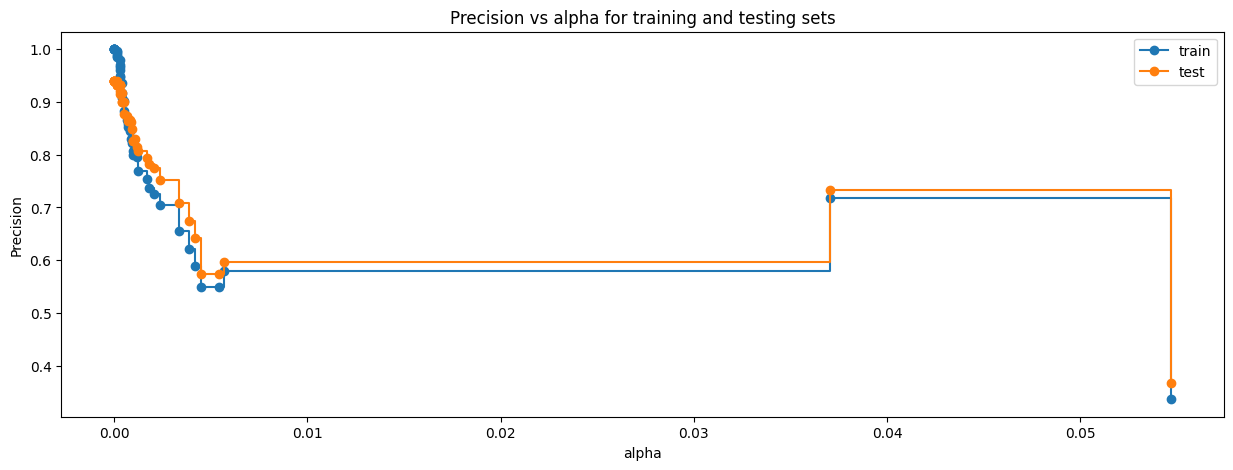

In [187]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train1, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test1, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [188]:
# creating the model where we get highest train and test precision
index_best_model = np.argmax(precision_test1)
best_model1 = clfs1[index_best_model]
print(best_model1)

DecisionTreeClassifier(class_weight='balanced', random_state=42)


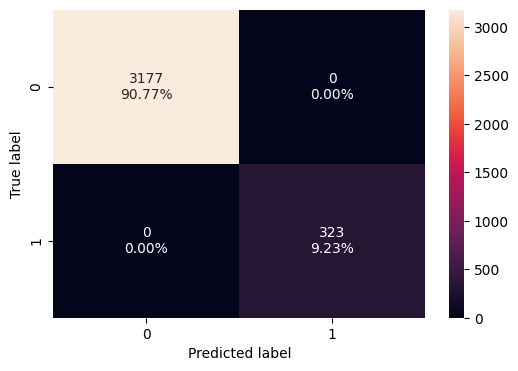

In [189]:
#create confusion matrix for test data
model5 = best_model1
confusion_matrix_sklearn(model5, X_train, y_train)

In [190]:
#get various scores for training data
decision_tree_post_perf_train1 = model_performance_classification_sklearn(
    model5, X_train, y_train
)
decision_tree_post_perf_train1

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

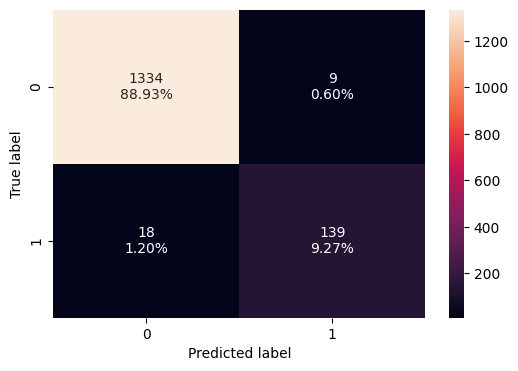

In [191]:
#create confusion matrix for test data
confusion_matrix_sklearn(model5, X_test, y_test)

In [192]:
#get various scores for test data
decision_tree_post_test1 = model_performance_classification_sklearn(
    model5, X_test, y_test
)
decision_tree_post_test1

Accuracy   Recall  Precision        F1
0     0.982  0.88535   0.939189  0.911475

**Observations:**
- Decision Tree(post pruning) without class weight model performs better than with class weight. Precision score is highest for Decision Tree(post pruning) without class weight.

In [195]:
importances = model5.feature_importances_
indices = np.argsort(importances)

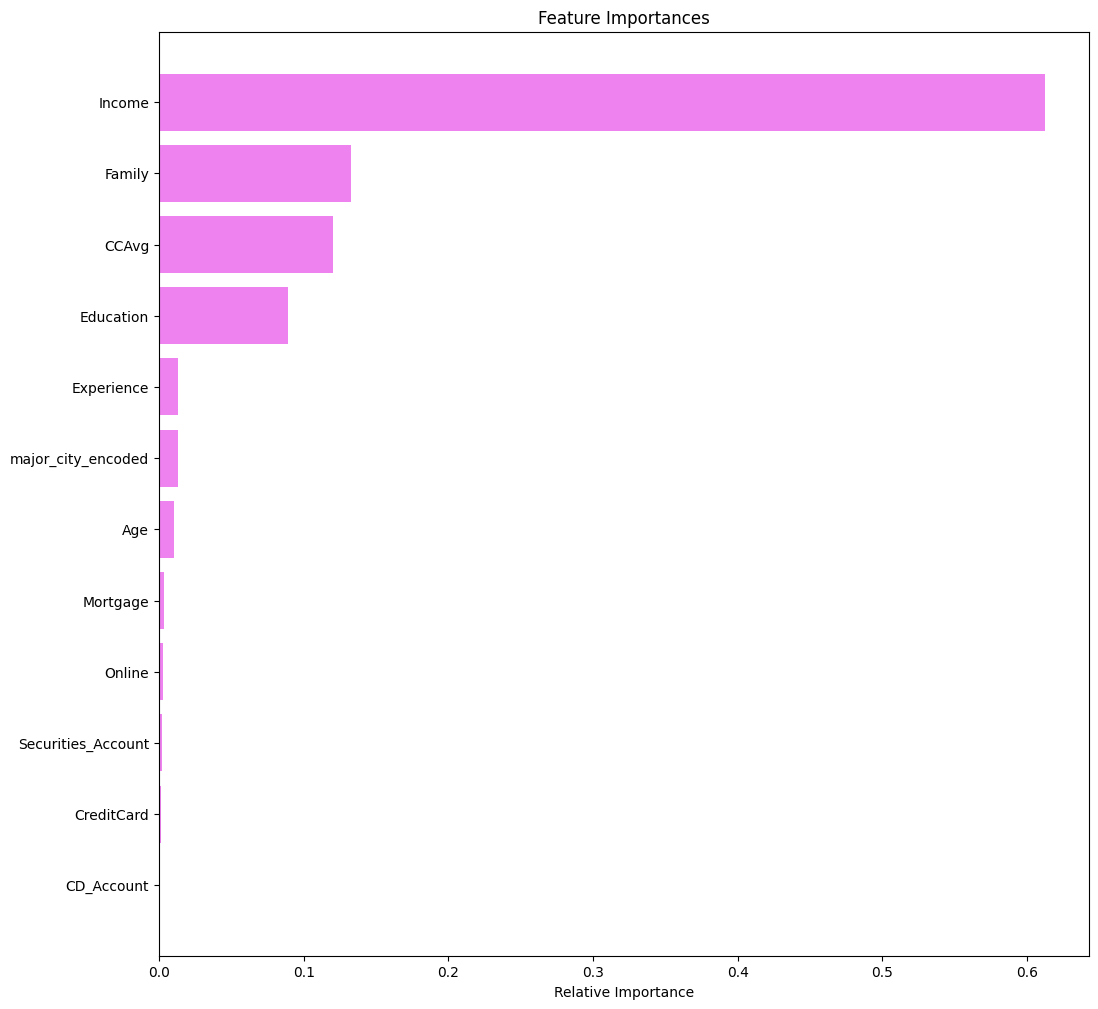

In [196]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
- Income, Family and CCAvg are the top 3 important features.

## Model Performance Comparison and Final Model Selection

In [193]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_default_perf_train.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_tune_perf_train1.T,
        decision_tree_post_perf_train.T,
        decision_tree_post_perf_train1.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning) without class_weight",
    "Decision Tree (Pre-Pruning) with class_weight",
    "Decision Tree (Post-Pruning) without class_weight",
    "Decision Tree (Post-Pruning) with class_weight",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                               1.0                              1.0   
Recall                                 1.0                              1.0   
Precision                              1.0                              1.0   
F1                                     1.0                              1.0   

           Decision Tree (Pre-Pruning) without class_weight  \
Accuracy                                           0.983143   
Recall                                             0.826625   
Precision                                          0.988889   
F1                                                 0.900506   

           Decision Tree (Pre-Pruning) with class_weight  \
Accuracy                                        0.978000   
Recall                                          0.996904   
Precision                                       0.809045   
F1                                              0.893204   

           Decision Tree (Post-Pruning) without class_weight  \
Accuracy                                            0.981143   
Recall                                              0.795666   
Precision                                           1.000000   
F1                                                  0.886207   

           Decision Tree (Post-Pruning) with class_weight  
Accuracy                                              1.0  
Recall                                                1.0  
Precision                                             1.0  
F1                                                    1.0

In [194]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_default_perf_test.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_tune_perf_test1.T,
        decision_tree_post_test.T,
        decision_tree_post_test1.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Pre-Pruning) with class_weight",
    "Decision Tree (Post-Pruning) without class_weight",
    "Decision Tree (Post-Pruning) with class_weight",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree (sklearn default)  Decision Tree with class_weight  \
Accuracy                          0.978667                         0.982000   
Recall                            0.891720                         0.885350   
Precision                         0.903226                         0.939189   
F1                                0.897436                         0.911475   

           Decision Tree (Pre-Pruning)  \
Accuracy                      0.984000   
Recall                        0.866242   
Precision                     0.978417   
F1                            0.918919   

           Decision Tree (Pre-Pruning) with class_weight  \
Accuracy                                        0.970000   
Recall                                          0.936306   
Precision                                       0.807692   
F1                                              0.867257   

           Decision Tree (Post-Pruning) without class_weight  \
Accuracy                                            0.979333   
Recall                                              0.802548   
Precision                                           1.000000   
F1                                                  0.890459   

           Decision Tree (Post-Pruning) with class_weight  
Accuracy                                         0.982000  
Recall                                           0.885350  
Precision                                        0.939189  
F1                                               0.911475

**Observations:**
- Decision Tree (post pruning) without class weight has the highest precision score (1.0) with test data. It has performed very well with test data.
-  I chose to do analyze pre-pruning and post pruning models with and without class weight to understand how the different models perform. It’s observed that class_weight helps in getting better Recall score. Both pre-pruning model and post pruning model with class_weight have better recall score. However, our focus in solving this business problem is have better Precision score.
- **So Decision Tree (post pruning) without Class_weight is our final model.**                                                    


Please refer to Decision Tree(post pruning) without Class weight section for Feature importance, decision rules, tree visualization and other details.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

- Use the Decision Tree(post pruning) without class weight model.
- Education, Income and Family are the top 3  important features. The bank should focus closely on these variables and target campaigning according to the below decision rules.
- Based on the decision rules of the model, we can make the following interpretation:
    - If Income is less than or equal to 113.50, irrespective of CCAvg, the customer  will not take personal loan.
    - If Income is more than 113.50, education is less than graduate degree
      - If Family size is less than or equal to 2.5, customer will not take personal loan
      - If family size is more than 2.5, customer will take personal loan.
    -  If Income is more than 113.50 and less than or equal to 116.50,
      - If education is graduate degree or more, the customer will not take a personal loan
    - If income is more than 116.50,
      - If education is graduate degree or more, the customer will take a personal loan.

___